In [159]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pandas.plotting import autocorrelation_plot

from scipy.stats import boxcox

In [176]:
ticker = 'TSLA'
df = pd.DataFrame()
df['Adj Close'] = wb.DataReader(ticker, data_source = 'yahoo', 
                                      start = '2011-12-1', end = '2020-7-31')['Adj Close']

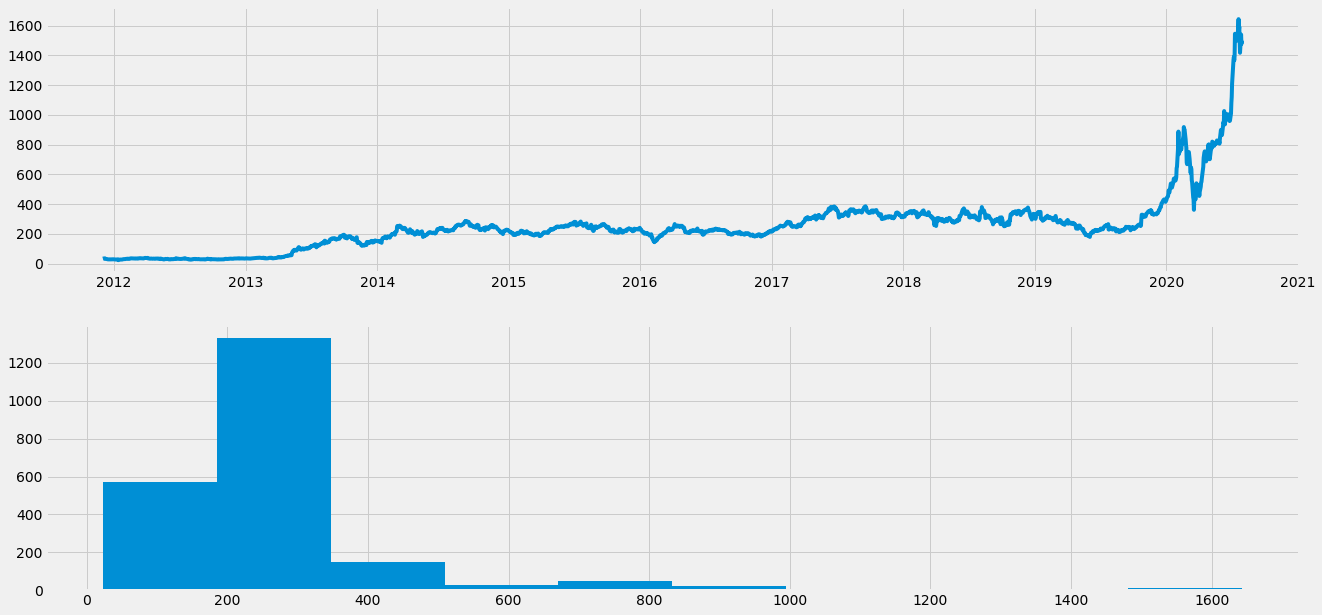

In [177]:
plt.figure(figsize = (20,10))
# line plot 
plt.subplot(211) 
plt.plot(df['Adj Close']) 
# histogram 
plt.subplot(212) 
plt.hist(df['Adj Close']) 
plt.show()

In [178]:
values = pd.DataFrame(df.values)

In [179]:
lags = 9
columns = [values] 
for i in range(1,(lags + 1)):
    columns.append(values.shift(i)) 
dataframe = pd.concat(columns, axis=1) 
columns = ['t']

In [180]:
columns

['t']

In [181]:
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))

In [182]:
dataframe.columns = columns

In [183]:
dataframe

,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9
0,32.599998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33.299999,32.599998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34.419998,33.299999,32.599998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34.869999,34.419998,33.299999,32.599998,NaN,NaN,NaN,NaN,NaN,NaN
4,34.189999,34.869999,34.419998,33.299999,32.599998,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2173,1513.069946,1592.329956,1568.359985,1643.000000,1500.839966,1500.640015,1546.010010,1516.800049,1497.060059,1544.650024
2174,1417.000000,1513.069946,1592.329956,1568.359985,1643.000000,1500.839966,1500.640015,1546.010010,1516.800049,1497.060059
2175,1539.599976,1417.000000,1513.069946,1592.329956,1568.359985,1643.000000,1500.839966,1500.640015,1546.010010,1516.800049
2176,1476.489990,1539.599976,1417.000000,1513.069946,1592.329956,1568.359985,1643.000000,1500.839966,1500.640015,1546.010010


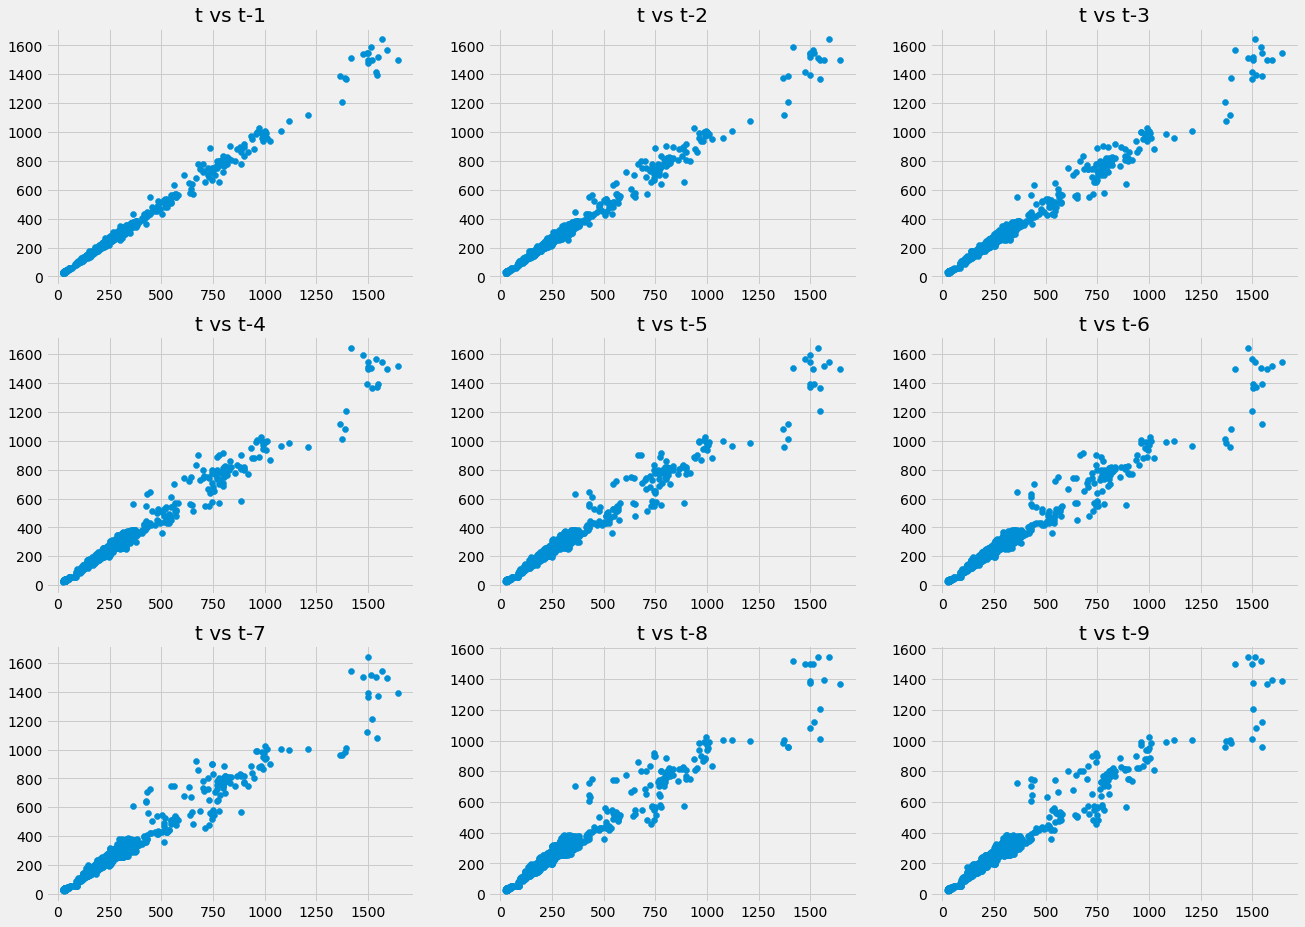

In [184]:

plt.figure(figsize = (20,15))

for i in range(1,(lags + 1)):
    ax = plt.subplot(330 + i)
    ax.set_title('t vs t-' + str(i)) 
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)

plt.show();

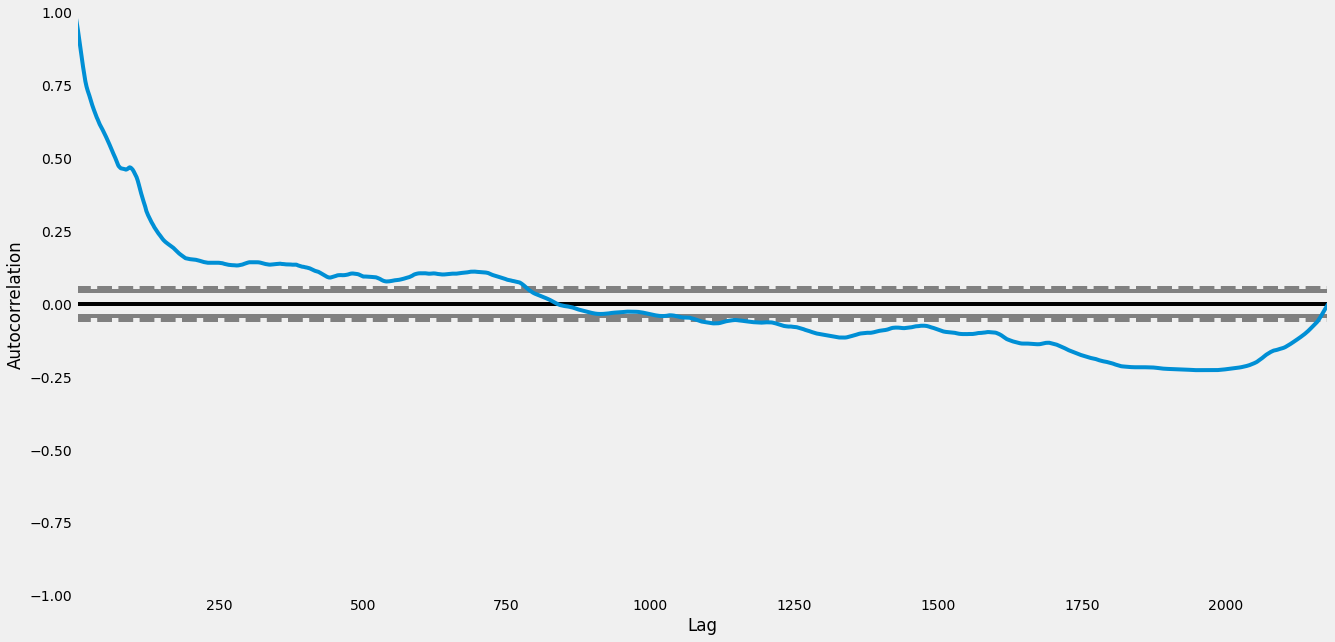

In [185]:
plt.figure(figsize = (20,10))
autocorrelation_plot(df['Adj Close']) 
plt.show()

In [ ]:
#Running the example, we generally see the expected trend, in this case across the ﬁrst few hundred lag observations.

In [ ]:
#Resulting plot shows lag across x-axis and the correlation of y-axis 
#Dotted lines are provided that indicate correlation values above those lines are statisically significant 
#sine waves so strong signs of seasonality in dataset 

In [144]:
#The dataset is non-stationary, meaning that the mean and the variance of the observations change over time. 
#This makes it diﬃcult to model by both classical statistical methods, like ARIMA, and more sophisticated 
#machine learning methods, like neural networks. This is caused by what appears to be both an increasing trend 
#and a seasonality component.

In [ ]:
#Square root transformation 

In [153]:
dataframe = pd.DataFrame(df.values) 
dataframe.columns = ['Adj Close'] 
dataframe['Adj Close'] = np.sqrt(dataframe['Adj Close']) 

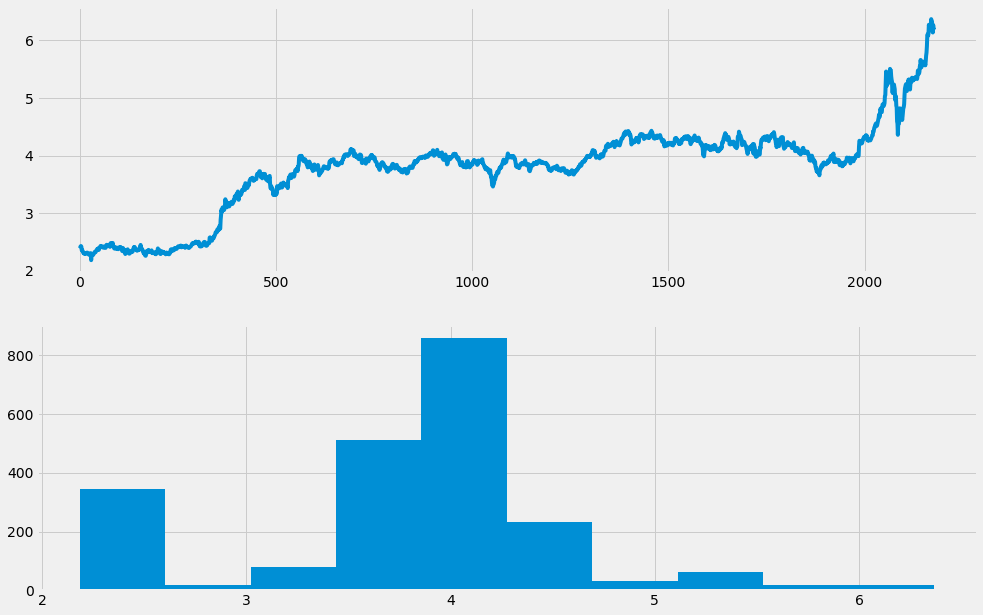

In [154]:
plt.figure(figsize = (15,10)) 
# line plot 
plt.subplot(211) 
plt.plot(dataframe['Adj Close']) 
# histogram 
plt.subplot(212) 
plt.hist(dataframe['Adj Close']) 
plt.show()

In [152]:
# Log Transformation


#Log transforms are popular with time series data as they are eﬀective at removing exponential variance. 
#It is important to note that this operation assumes values are positive and non-zero. 
#It is common to transform observations by adding a ﬁxed constant to ensure all input values meet this requirement.

In [156]:
dataframe = pd.DataFrame(df.values) 
dataframe.columns = ['Adj Close'] 
dataframe['Adj Close'] = np.log(dataframe['Adj Close']) 

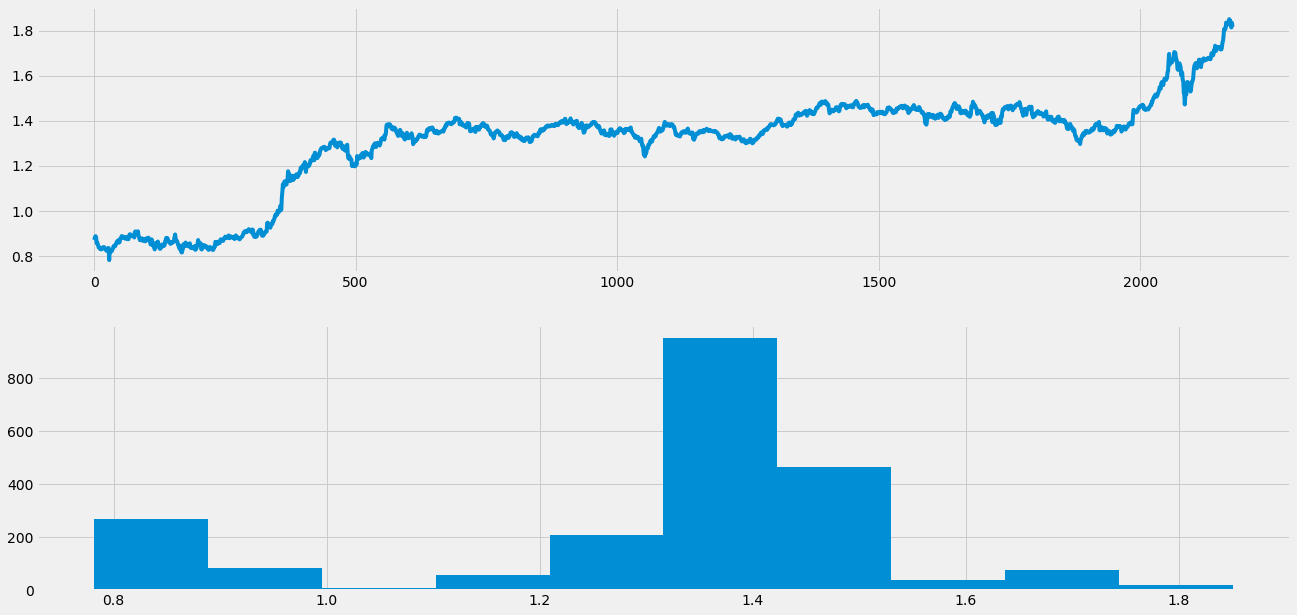

In [157]:
plt.figure(figsize = (20,10)) 
# line plot 
plt.subplot(211)
plt.plot(dataframe['Adj Close']) 
# histogram 
plt.subplot(212) 
plt.hist(dataframe['Adj Close']) 
plt.show()

In [158]:
#Box Cox Transformation
# • lambda = -1.0 is a reciprocal transform.

# • lambda = -0.5 is a reciprocal square root transform.

# • lambda = 0.0 is a log transform.

# • lambda = 0.5 is a square root transform.

# • lambda = 1.0 is no transform.

In [160]:
dataframe = pd.DataFrame(df.values) 
dataframe.columns = ['Adj Close'] 
dataframe['Adj Close'], lam = boxcox(dataframe['Adj Close']) 
print('Lambda: %f' % lam) 

Lambda: 2.815071


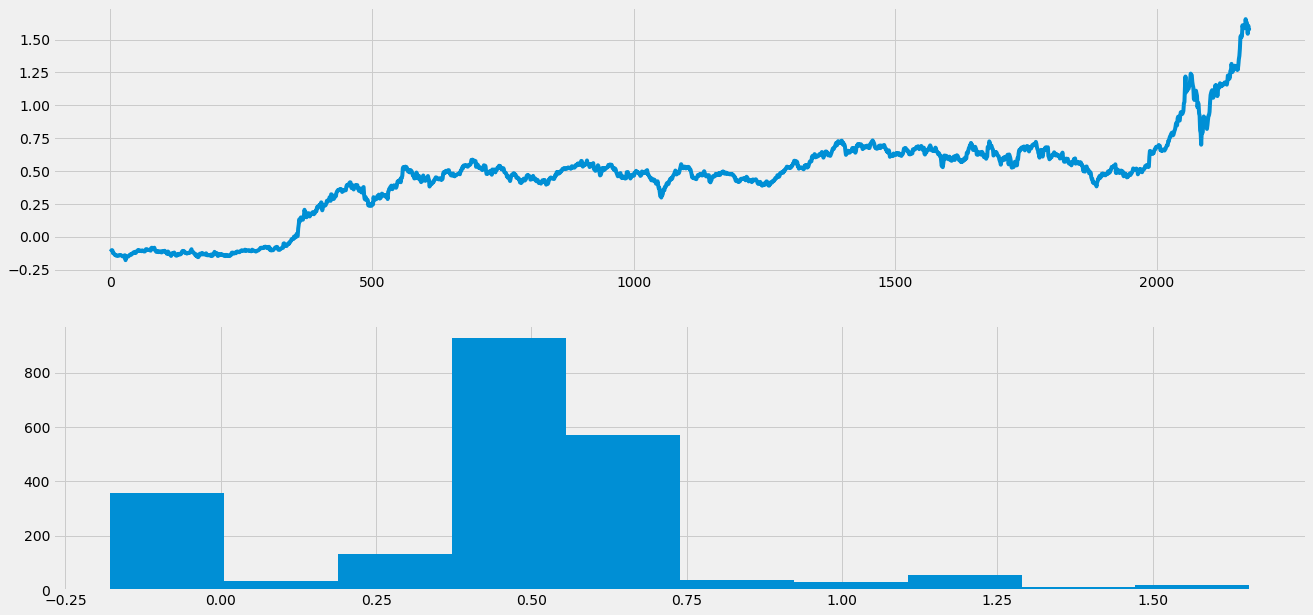

In [161]:
plt.figure(figsize = (20,10)) 
# line plot 
plt.subplot(211) 
plt.plot(dataframe['Adj Close']) 
# histogram 
plt.subplot(212) 
plt.hist(dataframe['Adj Close']) 
plt.show()

In [162]:
#np.sqrt seems to do the best. 

#Calculating a moving average of a time series makes some assumptions about your data. 
#It is assumed that both trend and seasonal components have been removed from your time series. 
#This means that your time series is stationary, or does not show obvious trends 
#(long-term increasing or decreasing movement) or seasonality (consistent periodic structure).

In [ ]:
#A time series may be white noise. 
#A time series is white noise if the variables are independent and identically distributed with a mean of zero. 
#This means that all variables have the same variance (sigma 2 ) 
#and each value has a zero correlation with all other values in the series. 
#If the variables in the series are drawn from a Gaussian distribution, 
#the series is called Gaussian white noise.

# • White noise time series is deﬁned by a zero mean, constant variance, and zero correlation.

# • If your time series is white noise, it cannot be predicted, 
#and if your forecast residuals are not white noise, you may be able to improve your model.

In [163]:
from statsmodels.tsa.stattools import adfuller

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [164]:
# statistical test 
result = adfuller(df['Adj Close']) 
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:') 

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.892463
p-value: 0.992991
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [ ]:
#The null hypothesis of the test is that the time series is non-stationary. 
#Running the example, we can see that the test statistic value was 0.341605. 
#This is larger than all of the critical values at the 1%, 5%, and 10% conﬁdence levels. 
#Therefore, we can say that the time series does appear to be non-stationary with a 
#low likelihood of the result being a statistical ﬂuke.

In [ ]:
#We can make the random walk stationary by taking the ﬁrst diﬀerence. 
#That is replacing each observation as the diﬀerence between it and the previous value.

A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

• Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.

• Non-Systematic: Components of the time series that cannot be directly modeled.

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise. These components are deﬁned as follows:

• Level: The average value in the series.

• Trend: The increasing or decreasing value in the series.

• Seasonality: The repeating short-term cycle in the series.

• Noise: The random variation in the series.

In [190]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10

In [198]:
type(df['Adj Close'])

pandas.core.series.Series

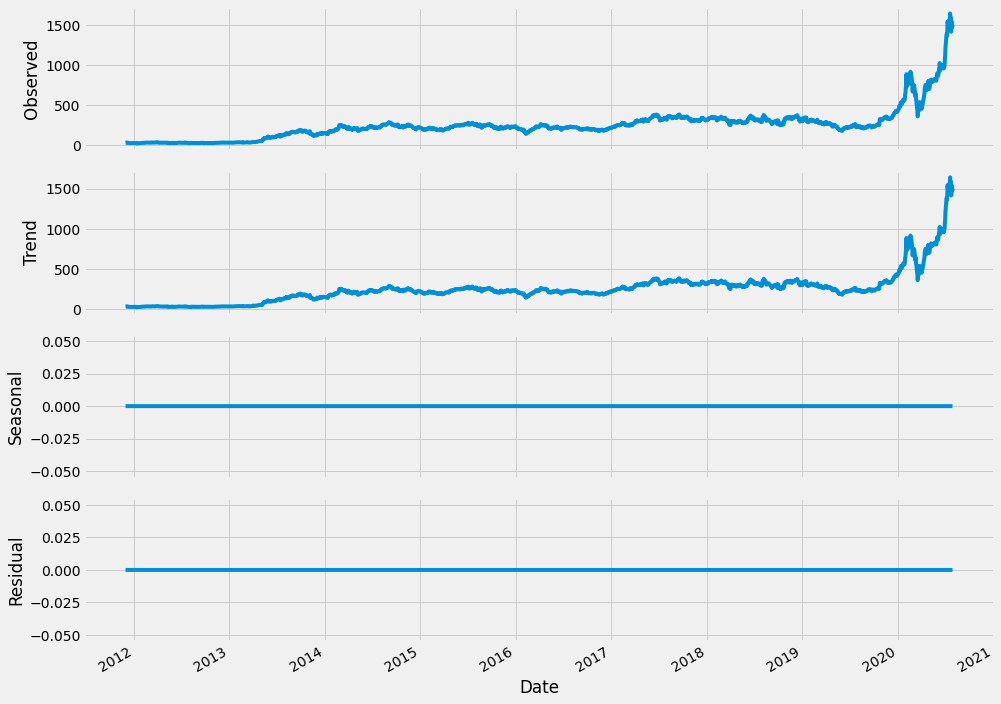

In [201]:
result = seasonal_decompose(df['Adj Close'], model='additive', freq = 1) 
result.plot() 
plt.show()

In [202]:
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [203]:
X = df.values 
size = int(len(X) * 0.66) 
train, test = X[0:size], X[size:len(X)] 
history = [x for x in train] 
predictions = list()

In [204]:
# walk-forward validation 

for t in range(len(test)):

    model = ARIMA(history, order=(5,1,0))

    model_fit = model.fit(disp=0)

    output = model_fit.forecast()

    yhat = output[0]

    predictions.append(yhat)

    obs = test[t]

    history.append(obs)

    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=351.672219, expected=347.459991
predicted=347.489265, expected=337.859985
predicted=338.124315, expected=341.350006
predicted=342.081215, expected=352.769989
predicted=354.000386, expected=352.929993
predicted=353.227559, expected=348.049988
predicted=347.300311, expected=345.660004
predicted=345.535530, expected=347.359985
predicted=348.019579, expected=353.179993
predicted=353.898196, expected=355.899994
predicted=356.171835, expected=355.399994
predicted=355.243573, expected=349.589996
predicted=349.303813, expected=344.529999
predicted=344.539360, expected=350.609985
predicted=351.446586, expected=343.399994
predicted=343.714152, expected=363.690002
predicted=364.381323, expected=362.750000
predicted=363.278702, expected=366.230011
predicted=365.710295, expected=377.640015
predicted=377.750924, expected=379.809998
predicted=380.378865, expected=385.000000
predicted=384.801558, expected=375.100006
predicted=374.646574, expected=373.910004
predicted=373.870085, expected=366

predicted=292.013644, expected=284.730011
predicted=284.512973, expected=291.820007
predicted=292.030648, expected=296.739990
predicted=296.736880, expected=291.130005
predicted=290.952105, expected=319.500000
predicted=320.447031, expected=316.089996
predicted=315.664073, expected=317.660004
predicted=317.759810, expected=332.100006
predicted=331.837188, expected=342.769989
predicted=342.636617, expected=344.779999
predicted=344.965217, expected=357.720001
predicted=357.910682, expected=358.170013
predicted=357.729638, expected=370.829987
predicted=371.224434, expected=352.549988
predicted=351.887041, expected=362.220001
predicted=362.331971, expected=347.510010
predicted=347.281261, expected=333.630005
predicted=333.599850, expected=333.010010
predicted=333.358398, expected=342.000000
predicted=342.513426, expected=344.500000
predicted=345.498267, expected=349.929993
predicted=350.643218, expected=342.950012
predicted=342.771460, expected=335.070007
predicted=334.736714, expected=310

predicted=288.667239, expected=289.959991
predicted=289.764164, expected=275.429993
predicted=275.845657, expected=269.489990
predicted=269.724087, expected=267.470001
predicted=267.475474, expected=273.600006
predicted=274.034532, expected=274.019989
predicted=274.849252, expected=264.529999
predicted=265.045902, expected=260.420013
predicted=260.459081, expected=267.769989
predicted=267.616415, expected=274.829987
predicted=275.155886, expected=278.619995
predicted=279.067939, expected=279.859985
predicted=279.866310, expected=289.179993
predicted=288.733043, expected=285.880005
predicted=285.815567, expected=291.809998
predicted=291.616915, expected=267.779999
predicted=268.187067, expected=274.959991
predicted=274.494084, expected=273.200012
predicted=273.631063, expected=272.309998
predicted=272.834294, expected=276.059998
predicted=276.674706, expected=268.420013
predicted=268.613675, expected=267.700012
predicted=267.831404, expected=266.380005
predicted=266.533042, expected=273

predicted=405.078167, expected=419.220001
predicted=419.012278, expected=425.250000
predicted=425.052679, expected=430.940002
predicted=430.744083, expected=430.380005
predicted=430.343198, expected=414.700012
predicted=414.464584, expected=418.329987
predicted=418.049591, expected=430.260010
predicted=430.524700, expected=443.010010
predicted=443.536571, expected=451.540009
predicted=451.995085, expected=469.059998
predicted=468.908948, expected=492.140015
predicted=492.168619, expected=481.339996
predicted=481.274238, expected=478.149994
predicted=477.435110, expected=524.859985
predicted=524.431310, expected=537.919983
predicted=538.251141, expected=518.500000
predicted=518.911917, expected=513.489990
predicted=513.669881, expected=510.500000
predicted=509.665441, expected=547.200012
predicted=547.510537, expected=569.559998
predicted=570.042287, expected=572.200012
predicted=571.992199, expected=564.820007
predicted=564.547037, expected=558.020020
predicted=557.976688, expected=566

In [205]:
# evaluate forecasts 
rmse = sqrt(mean_squared_error(test, predictions)) 
print('Test RMSE: %.3f' % rmse) 

Test RMSE: 23.528


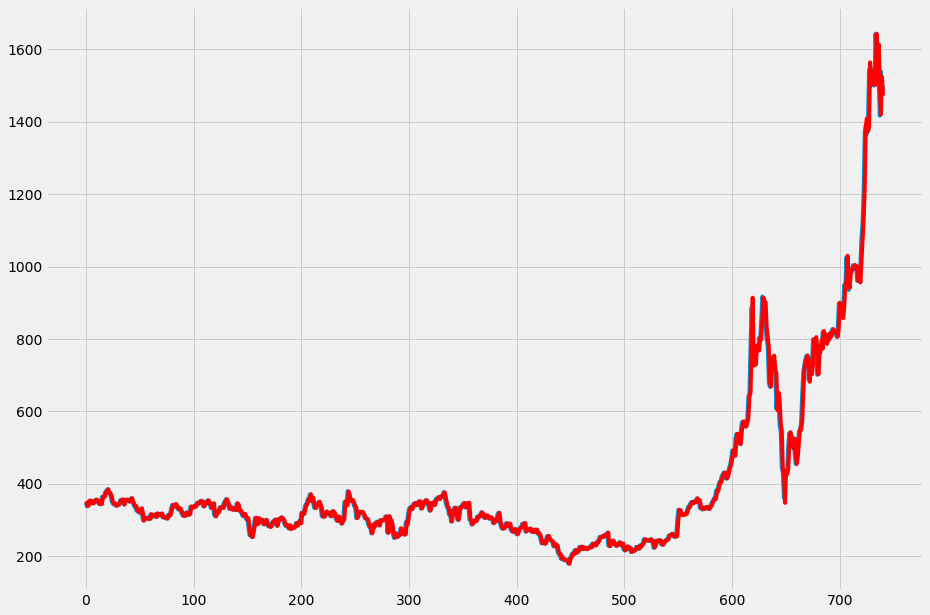

In [206]:
# plot forecasts against actual outcomes 
plt.plot(test) 
plt.plot(predictions, color='red') 
plt.show()

In [207]:
##Stationarity##

#Non-stationary 

In [212]:
X = df.values 
split = int(len(X) / 2)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean() 
var1, var2 = X1.var(), X2.var() 
print('mean1=%f, mean2=%f' % (mean1, mean2)) 
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=148.074830, mean2=355.313728
variance1=7867.335993, variance2=48254.726017


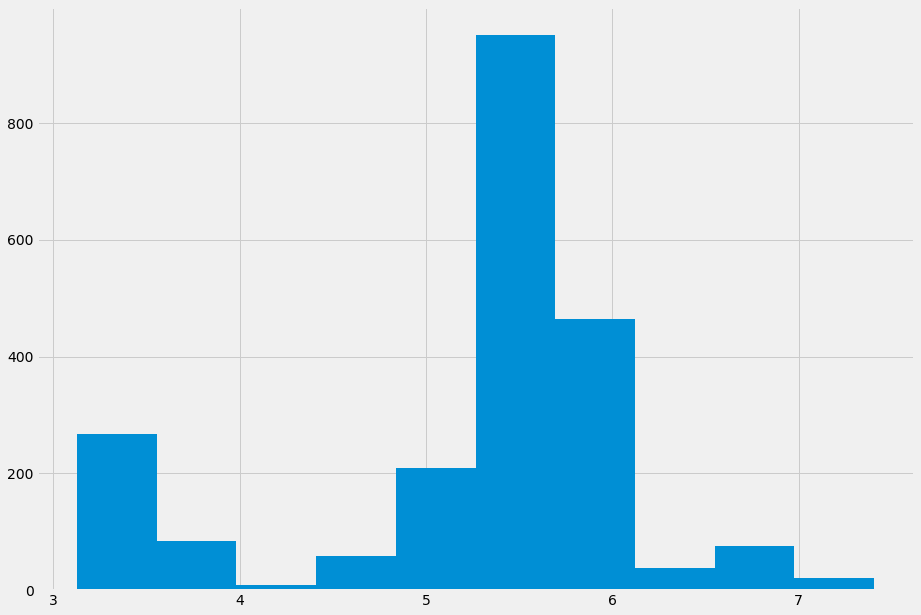

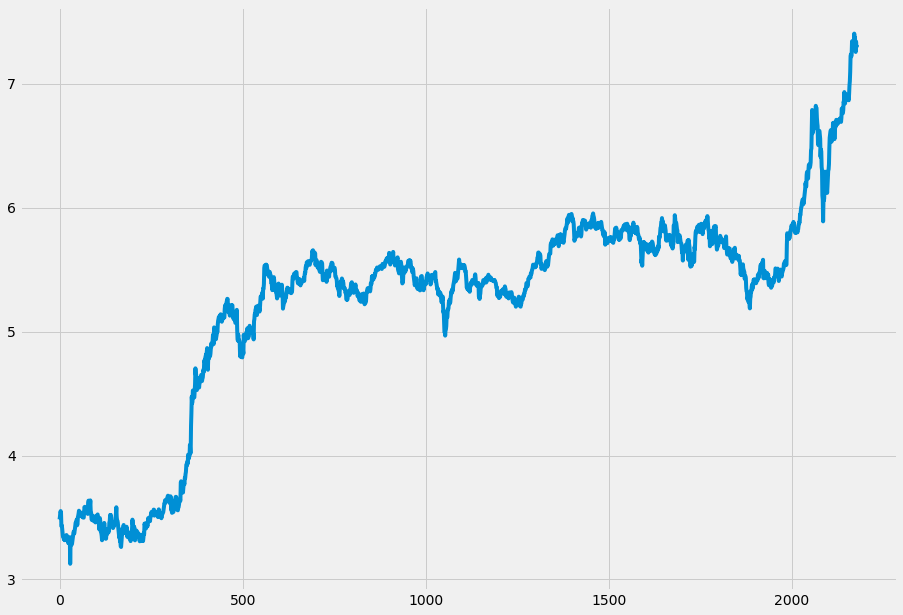

In [209]:
X = df.values 
X = np.log(X) 

plt.hist(X) 
plt.show() 
plt.plot(X) 
plt.show()

In [210]:
split = int(len(X) / 2)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean() 
var1, var2 = X1.var(), X2.var() 
print('mean1=%f, mean2=%f' % (mean1, mean2)) 
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=4.698302, mean2=5.764494
variance1=0.765853, variance2=0.170742


The Augmented Dickey-Fuller test is a type of statistical test called a unit root test 1 . The intuition behind a unit root test is that it determines how strongly a time series is deﬁned by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple diﬀerent lag values. The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

• Null Hypothesis (H0): Fail to reject, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

• Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

• p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

• p-value ≤ 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [221]:
df.head()

,Adj Close
Date,
2011-12-01,32.599998
2011-12-02,33.299999
2011-12-05,34.419998
2011-12-06,34.869999
2011-12-07,34.189999


In [225]:
X = df['Adj Close'].values 

In [226]:
result = adfuller(X) 

In [227]:
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:') 

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.519148
p-value: 1.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Running the example gives a diﬀerent picture than the above. The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary). Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.

In [230]:
X = df['Adj Close'].values 
X = np.log(X) 
result = adfuller(X) 
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.451243
p-value: 0.901185
	1%: -3.433
	5%: -2.863
	10%: -2.567


In applied machine learning, we often split our data into a train and a test set: the training set used to prepare the model and the test set used to evaluate it. We may even use k-fold cross-validation that repeats this process by systematically splitting the data into k groups, each given a chance to be a held out model.

These methods cannot be directly used with time series data. This is because they assume that there is no relationship between the observations, that each observation is independent. This is not true of time series data, where the time dimension of observations means that we cannot randomly split them into groups. Instead, we must split data up and respect the temporal order in which values were observed.

In time series forecasting, this evaluation of models on historical data is called backtesting. In some time series domains, such as meteorology, this is called hindcasting, as opposed to forecasting. We will look at three diﬀerent methods that you can use to backtest your machine learning models on time series problems. They are:

1. Train-Test split that respect temporal order of observations.

2. Multiple Train-Test splits that respect temporal order of observations.

3. Walk-Forward Validation where a model may be updated each time step new data is received.

In [231]:
##Univariate Train Test Spit ###

In [233]:
X = df.values 
train_size = int(len(X) * 0.66) 
train, test = X[0:train_size], X[train_size:len(X)] 
print('Observations: %d' % (len(X))) 
print('Training Observations: %d' % (len(train))) 
print('Testing Observations: %d' % (len(test)))

Observations: 2178
Training Observations: 1437
Testing Observations: 741


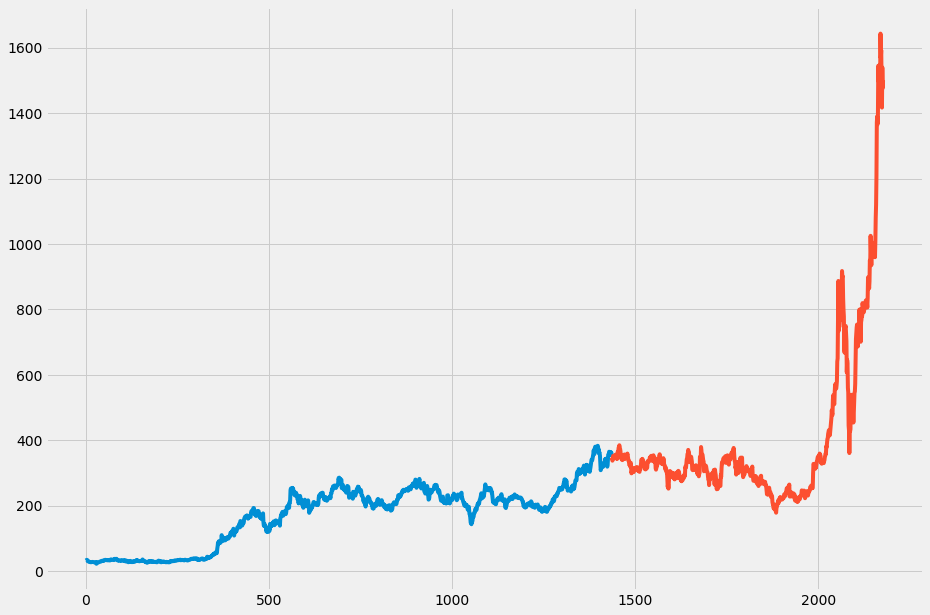

In [234]:
plt.plot(train) 
plt.plot([None for i in train] + [x for x in test]) 
plt.show()

In [237]:
from sklearn.model_selection import TimeSeriesSplit

Observations: 1090
Training Observations: 546
Testing Observations: 544


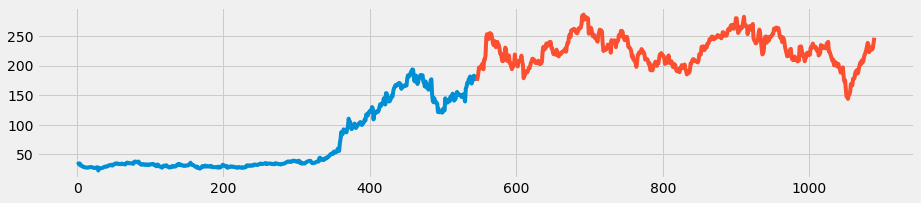

Observations: 1634
Training Observations: 1090
Testing Observations: 544


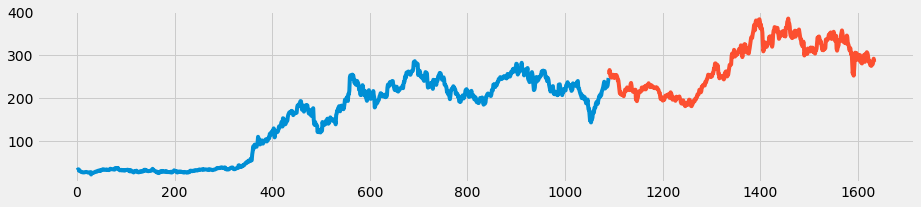

Observations: 2178
Training Observations: 1634
Testing Observations: 544


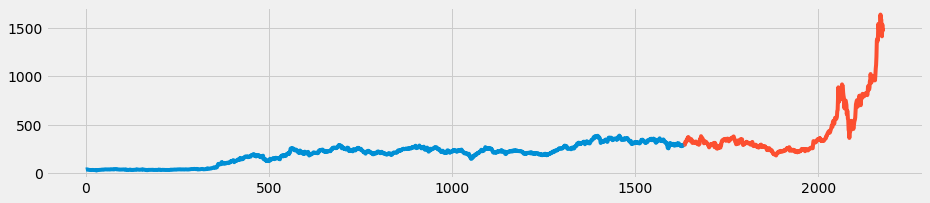

In [238]:
X = df.values

splits = TimeSeriesSplit(n_splits=3)

plt.figure(1) 
index = 1 

for train_index, test_index in splits.split(X):

    train = X[train_index]

    test = X[test_index]

    print('Observations: %d' % (len(train) + len(test))) 
    print('Training Observations: %d' % (len(train))) 
    print('Testing Observations: %d' % (len(test))) 
    plt.subplot(310 + index) 
    plt.plot(train) 
    plt.plot([None for i in train] + [x for x in test]) 
    index += 1 
    plt.show()

Using multiple train-test splits will result in more models being trained, and in turn, a more accurate estimate of the performance of the models on unseen data. A limitation of the train-test split approach is that the trained models remain ﬁxed as they are evaluated on each evaluation in the test set. This may not be realistic as models can be retrained as new daily or monthly observations are made available. This concern is addressed in the next section.

n practice, we very likely will retrain our model as new data becomes available. This would give the model the best opportunity to make good forecasts at each time step. We can evaluate our machine learning models under this assumption. There are few decisions to make: 16.5. Walk Forward Validation

152

1. Minimum Number of Observations. First, we must select the minimum number of observations required to train the model. This may be thought of as the window width if a sliding window is used (see next point).

2. Sliding or Expanding Window. Next, we need to decide whether the model will be trained on all data it has available or only on the most recent observations. This determines whether a sliding or expanding window will be used.

After a sensible conﬁguration is chosen for your test-setup, models can be trained and evaluated.

1. Starting at the beginning of the time series, the minimum number of samples in the window is used to train a model.

2. The model makes a prediction for the next time step.

3. The prediction is stored or evaluated against the known value.

4. The window is expanded to include the known value and the process is repeated (go to step 1.)

Because this methodology involves moving along the time series one-time step at a time, it is often called Walk Forward Testing or Walk Forward Validation. Additionally, because a sliding or expanding window is used to train a model, this method is also referred to as Rolling Window Analysis or a Rolling Forecast. This capability is currently not available in scikit-learn, although you could contrive the same eﬀect with a carefully conﬁgured TimeSeriesSplit.

In [239]:
X = df.values 
n_train = 500 
n_records = len(X) 

for i in range(n_train, n_records):

    train, test = X[0:i], X[i:i+1]

    print('train=%d, test=%d' % (len(train), len(test)))

train=500, test=1
train=501, test=1
train=502, test=1
train=503, test=1
train=504, test=1
train=505, test=1
train=506, test=1
train=507, test=1
train=508, test=1
train=509, test=1
train=510, test=1
train=511, test=1
train=512, test=1
train=513, test=1
train=514, test=1
train=515, test=1
train=516, test=1
train=517, test=1
train=518, test=1
train=519, test=1
train=520, test=1
train=521, test=1
train=522, test=1
train=523, test=1
train=524, test=1
train=525, test=1
train=526, test=1
train=527, test=1
train=528, test=1
train=529, test=1
train=530, test=1
train=531, test=1
train=532, test=1
train=533, test=1
train=534, test=1
train=535, test=1
train=536, test=1
train=537, test=1
train=538, test=1
train=539, test=1
train=540, test=1
train=541, test=1
train=542, test=1
train=543, test=1
train=544, test=1
train=545, test=1
train=546, test=1
train=547, test=1
train=548, test=1
train=549, test=1
train=550, test=1
train=551, test=1
train=552, test=1
train=553, test=1
train=554, test=1
train=555,

You can see that many more models are created. This has the beneﬁt again of providing a much more robust estimation of how the chosen modeling method and parameters will perform in practice. This improved estimate comes at the computational cost of creating so many models. This is not expensive if the modeling method is simple or dataset is small (as in this example), but could be an issue at scale. In the above case, 2,820 models would be created and evaluated.

As such, careful attention needs to be paid to the window width and window type. These could be adjusted to contrive a test harness on your problem that is signiﬁcantly less computationally expensive. Walk-forward validation is the gold standard of model evaluation. It is the k-fold cross-validation of the time series world and is recommended for your own projects.

In [240]:
### Regression Metrics ###

The mean squared error, or MSE, is calculated as the average of the squared forecast error values. Squaring the forecast error values forces them to be positive; it also has the eﬀect of putting more weight on large errors. Very large or outlier forecast errors are squared, which in turn has the eﬀect of dragging the mean of the squared forecast errors out resulting in a larger mean squared error score. In eﬀect, the score gives worse performance to those models that make large wrong forecasts.

The mean squared error described above is in the squared units of the predictions. It can be transformed back into the original units of the predictions by taking the square root of the mean squared error score. This is called the root mean squared error, or RMSE.

In [ ]:
### Persistance Model of Forecasting### 

Three properties of a good technique for making a baseline forecast are:

Persistence Algorithm

• Simple: A method that requires little or no training or intelligence.

• Fast: A method that is fast to implement and computationally trivial to make a prediction.

• Repeatable: A method that is deterministic, meaning that it produces an expected output given the same input.

A common algorithm used in establishing a baseline performance is the persistence algorithm.

Persistence Algorithm

The most common baseline method for supervised machine learning is the Zero Rule algorithm. This algorithm predicts the majority class in the case of classiﬁcation, or the average outcome in the case of regression. This could be used for time series, but does not respect the serial correlation structure in time series datasets. The equivalent technique for use with time series dataset is the persistence algorithm.

The persistence algorithm uses the value at the current time step (t) to predict the expected outcome at the next time step (t+1). This satisﬁes the three above conditions for a baseline forecast.

A persistence model can be implemented easily in Python. We will break this tutorial down into 4 steps:

1. Transform the univariate dataset into a supervised learning problem.

2. Establish the train and test datasets for the test harness.

3. Deﬁne the persistence model.

4. Make a forecast and establish a baseline performance.

5. Review the complete example and plot the output.

In [242]:
# Create lagged dataset 
values = pd.DataFrame(df.values) 
dataframe = pd.concat([values.shift(1), values], axis=1) 
dataframe.columns = ['t', 't+1'] 
print(dataframe.head(5))

           t        t+1
0        NaN  32.599998
1  32.599998  33.299999
2  33.299999  34.419998
3  34.419998  34.869999
4  34.869999  34.189999


In [244]:
# split into train and test sets 
X = dataframe.values 
train_size = int(len(X) * 0.66) 
train, test = X[1:train_size], X[train_size:] 
train_X, train_y = train[:,0], train[:,1] 
test_X, test_y = test[:,0], test[:,1]

In [245]:
# persistence model 
def model_persistence(x):
    return x

In [247]:
# walk-forward validation 
predictions = list() 

for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat) 
    
rmse = sqrt(mean_squared_error(test_y, predictions)) 
print('Test RMSE: %.3f' % rmse)

Test RMSE: 23.175


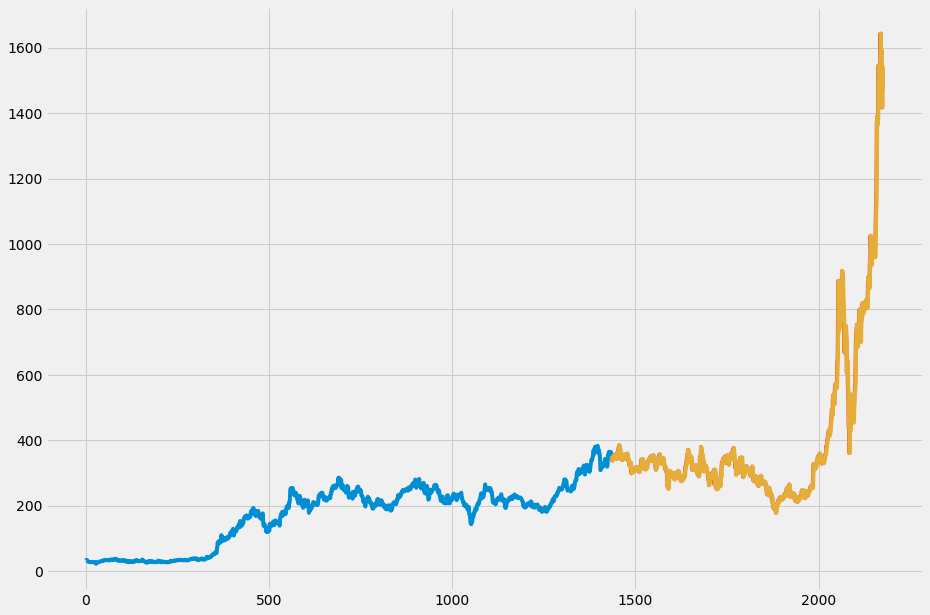

In [248]:
# plot predictions and expected results 
plt.plot(train_y) 
plt.plot([None for i in train_y] + [x for x in test_y]) 
plt.plot([None for i in train_y] + [x for x in predictions]) 
plt.show()

The persistence algorithm is naive. It is often called the naive forecast. It assumes nothing about the speciﬁcs of the time series problem to which it is applied. This is what makes it so easy to understand and so quick to implement and evaluate. As a machine learning practitioner, it can also spark a large number of improvements. Write them down. This is useful because these ideas can become input features in a feature engineering eﬀort or simple models that may be combined in an ensembling eﬀort later.

In [249]:
#Visualize Residual ForeCast Errors ##

We often stop there and summarize the skill of a model as a summary of this error. Instead, we can collect these individual residual errors across all forecasts and use them to better understand the forecast model. Generally, when exploring residual errors we are looking for patterns or structure. A sign of a pattern suggests that the errors are not random.

We expect the residual errors to be random, because it means that the model has captured all of the structure and the only error left is the random ﬂuctuations in the time series that cannot be modeled. A sign of a pattern or structure suggests that there is more information that a model could capture and use to make better predictions.

In [250]:
# calculate residuals 
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]

In [251]:
residuals = pd.DataFrame(residuals) 
print(residuals.head())

           0
0  -4.460022
1  -9.600006
2   3.490021
3  11.419983
4   0.160004


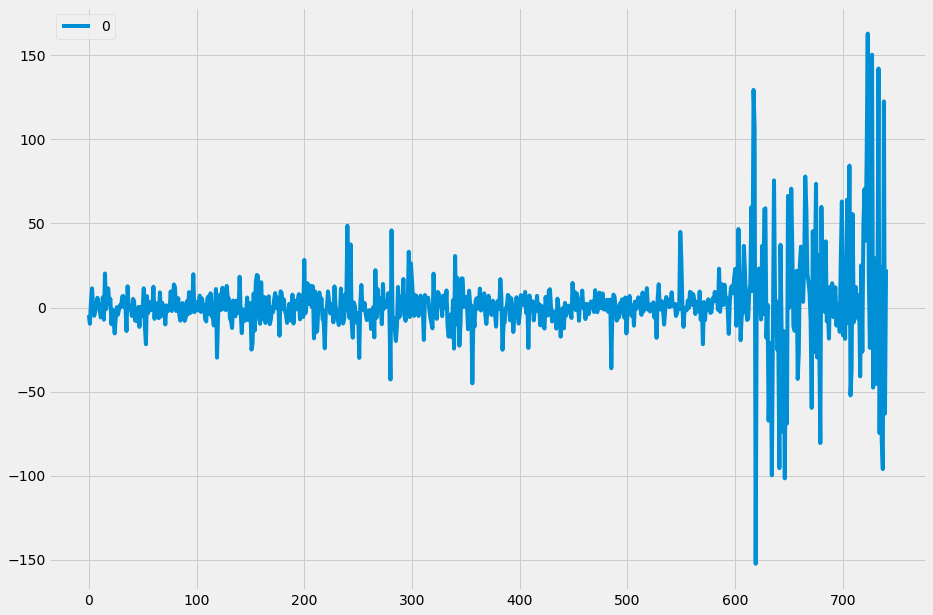

In [252]:
# plot residuals 
residuals.plot() 
plt.show()

We can calculate summary statistics on the residual errors. Primarily, we are interested in the mean value of the residual errors. A value close to zero suggests no bias in the forecasts, whereas positive and negative values suggest a positive or negative bias in the forecasts made. It is useful to know about a bias in the forecasts as it can be directly corrected in forecasts prior to their use or evaluation.

In [253]:
# summary statistics 
print(residuals.describe())

                0
count  741.000000
mean     1.548165
std     23.139037
min   -152.359985
25%     -5.619995
50%      0.260010
75%      6.479996
max    162.919922


Plots can be used to better understand the distribution of errors beyond summary statistics. We would expect the forecast errors to be normally distributed around a zero mean. Plots can help discover skews in this distribution. We can use both histograms and density plots to better understand the distribution of residual errors.

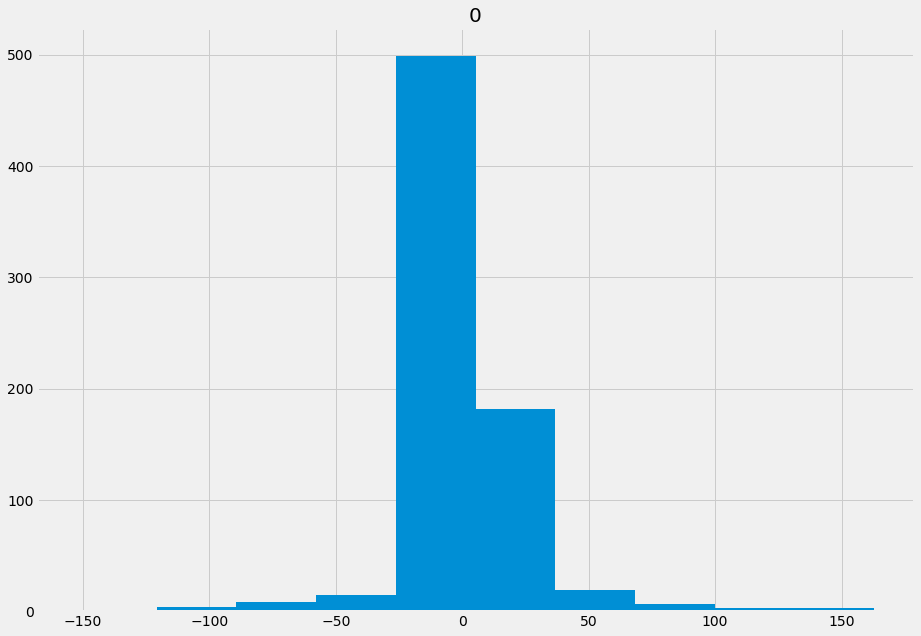

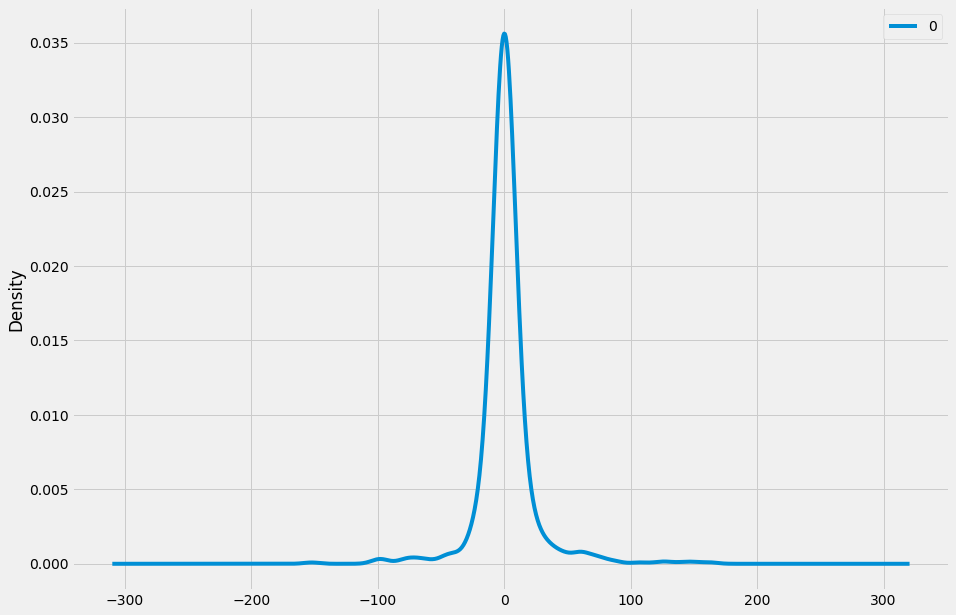

In [254]:
# histogram plot 
residuals.hist() 

plt.show() 

# density plot

residuals.plot(kind='kde')

plt.show()

A Q-Q plot, or quantile plot, compares two distributions and can be used to see how similar or diﬀerent they happen to be. We can create a Q-Q plot using the qqplot() function 1 in the Statsmodels library.

The Q-Q plot can be used to quickly check the normality of the distribution of residual errors. The values are ordered and compared to an idealized Gaussian distribution. The comparison is shown as a scatter plot (theoretical on the x-axis and observed on the y-axis) where a match between the two distributions is shown as a diagonal line from the bottom left to the top-right of the plot.

The plot is helpful to spot obvious departures from this expectation.

In [257]:
from statsmodels.graphics.gofplots import qqplot

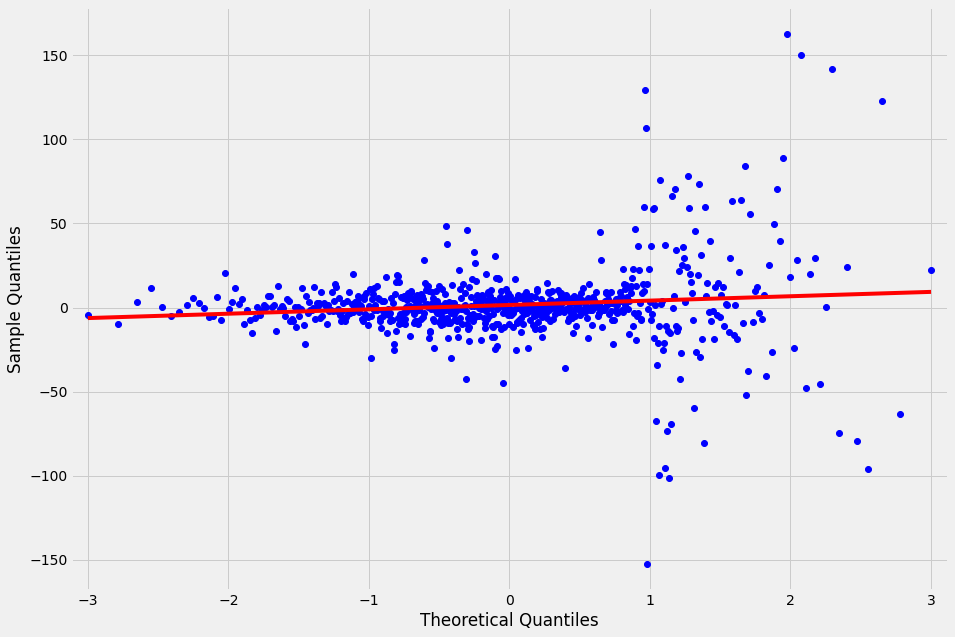

In [258]:
residuals = np.array(residuals) 
qqplot(residuals, line='r') 
plt.show()

Autocorrelation calculates the strength of the relationship between an observation and observations at prior time steps. We can calculate the autocorrelation of the residual error time series and plot the results. This is called an autocorrelation plot. We would not expect there to be any correlation between the residuals. This would be shown by autocorrelation scores being below the threshold of signiﬁcance (dashed and dotted horizontal lines on the plot).

A signiﬁcant autocorrelation in the residual plot suggests that the model could be doing a better job of incorporating the relationship between observations and lagged observations, called autoregression. Pandas provides a built-in function for calculating an autocorrelation plot, called autocorrelation plot().

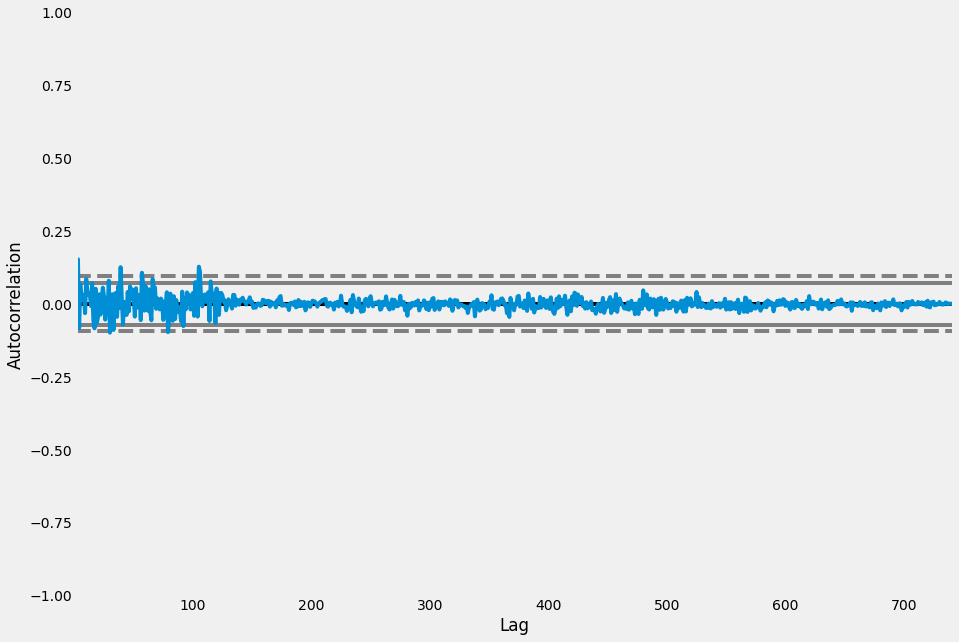

In [259]:
# calculate residuals 
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))] 
residuals = pd.DataFrame(residuals) 
autocorrelation_plot(residuals) 
plt.show()

Running the example creates an autoregression plot of other residual errors. We do not see an obvious autocorrelation trend across the plot. There may be some positive autocorrelation worthy of further investigation at lag 50 and 100 that seems signiﬁcant.

In [260]:
#Forcasting into the future#

In [261]:
# create lagged dataset 
#Forecast 7 days into the future 
values = pd.DataFrame(df.values) 
dataframe = pd.concat([values.shift(1), values, values.shift(-1), 
                       values.shift(-2), values.shift(-3), values.shift(-4), values.shift(-5),
                       values.shift(-6)], axis=1)

dataframe.columns = ['t', 't+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7'] 
print(dataframe.head(14))

            t        t+1        t+2        t+3        t+4        t+5  \
0         NaN  32.599998  33.299999  34.419998  34.869999  34.189999   
1   32.599998  33.299999  34.419998  34.869999  34.189999  30.889999   
2   33.299999  34.419998  34.869999  34.189999  30.889999  31.040001   
3   34.419998  34.869999  34.189999  30.889999  31.040001  30.410000   
4   34.869999  34.189999  30.889999  31.040001  30.410000  29.450001   
5   34.189999  30.889999  31.040001  30.410000  29.450001  28.530001   
6   30.889999  31.040001  30.410000  29.450001  28.530001  28.620001   
7   31.040001  30.410000  29.450001  28.530001  28.620001  28.000000   
8   30.410000  29.450001  28.530001  28.620001  28.000000  27.750000   
9   29.450001  28.530001  28.620001  28.000000  27.750000  27.900000   
10  28.530001  28.620001  28.000000  27.750000  27.900000  27.570000   
11  28.620001  28.000000  27.750000  27.900000  27.570000  27.770000   
12  28.000000  27.750000  27.900000  27.570000  27.770000  27.90

An ARIMA model is a class of statistical model for analyzing and forecasting time series data. ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration. This acronym is descriptive, capturing the key aspects of the model itself. Brieﬂy, they are:

• AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

• I: Integrated. The use of diﬀerencing of raw observations (i.e. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

• MA: Moving Average. A model that uses the dependency between an observation and residual errors from a moving average model applied to lagged observations.


Each of these components are explicitly speciﬁed in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the speciﬁc ARIMA model being used. The parameters of the ARIMA model are deﬁned as follows:

• p: The number of lag observations included in the model, also called the lag order.

• d: The number of times that the raw observations are diﬀerenced, also called the degree of diﬀerencing.

• q: The size of the moving average window, also called the order of moving average.

21.3 Identiﬁcation

The identiﬁcation step is further broken down into: Assess whether the time series is stationary, and if not, how many diﬀerences are required to make it stationary. Identify the parameters of an ARMA model for the data.

21.3.1 Diﬀerencing

Below are some tips during identiﬁcation.

• Unit Root Tests. Use unit root statistical tests on the time series to determine whether or not it is stationary. Repeat after each round of diﬀerencing.

• Avoid over diﬀerencing. Diﬀerencing the time series more than is required can result in the addition of extra serial correlation and additional complexity.

21.3.2 Conﬁguring AR and MA

Two diagnostic plots can be used to help choose the p and q parameters of the ARMA or ARIMA. They are:

• Autocorrelation Function (ACF). The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coeﬃcient between -1 and 1 for negative and positive correlation.

• Partial Autocorrelation Function (PACF). The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.

Both plots are drawn as bar charts showing the 95% and 99% conﬁdence intervals as horizontal lines. Bars that cross these conﬁdence intervals are therefore more signiﬁcant and worth noting. Some useful patterns you may observe on these plots are:

• The model is AR if the ACF trails oﬀ after a lag and has a hard cut-oﬀ in the PACF after a lag. This lag is taken as the value for p.

• The model is MA if the PACF trails oﬀ after a lag and has a hard cut-oﬀ in the ACF after the lag. This lag value is taken as the value for q.

• The model is a mix of AR and MA if both the ACF and PACF trail oﬀ.


21.5 Diagnostic Checking

The idea of diagnostic checking is to look for evidence that the model is not a good ﬁt for the data. Two useful areas to investigate diagnostics are:

1. Overﬁtting.

2. Residual Errors.

21.5.1 Overﬁtting

The ﬁrst check is to check whether the model overﬁts the data. Generally, this means that the model is more complex than it needs to be and captures random noise in the training data. This is a problem for time series forecasting because it negatively impacts the ability of the model to generalize, resulting in poor forecast performance on out-of-sample data. Careful attention must be paid to both in-sample and out-of-sample performance and this requires the careful design of a robust test harness for evaluating models.

21.5.2 Residual Errors

Forecast residuals provide a great opportunity for diagnostics. A review of the distribution of errors can help tease out bias in the model. The errors from an ideal model would resemble white noise, that is a Gaussian distribution with a mean of zero and a symmetrical variance. For this, you may use density plots, histograms, and Q-Q plots that compare the distribution of errors to the expected distribution. A non-Gaussian distribution may suggest an opportunity for data pre-processing. A skew in the distribution or a non-zero mean may suggest a bias in forecasts that may be correct.

Additionally, an ideal model would leave no temporal structure in the time series of forecast residuals. These can be checked by creating ACF and PACF plots of the residual error time series. The presence of serial correlation in the residual errors suggests further opportunity for using this information in the model.

22.2 Autocorrelation

An autoregression model makes an assumption that the observations at current and previous time steps are useful to predict the value at the next time step. This relationship between variables is called correlation. If both variables change in the same direction (e.g. go up together or down together), this is called a positive correlation. If the variables move in opposite directions as values change (e.g. one goes up and one goes down), then this is called negative correlation.

We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various diﬀerent lags. The stronger the correlation between the output variable and a speciﬁc lagged variable, the more weight that autoregression model can put on that variable when modeling. Again, because the correlation is calculated between the variable and itself at previous time steps, it is called an autocorrelation. It is also called serial correlation because of the sequenced structure of time series data.

The correlation statistics can also help to choose which lag variables will be useful in a model and which will not. Interestingly, if all lag variables show low or no correlation with the output variable, then it suggests that the time series prob

In [262]:
from pandas.plotting import lag_plot

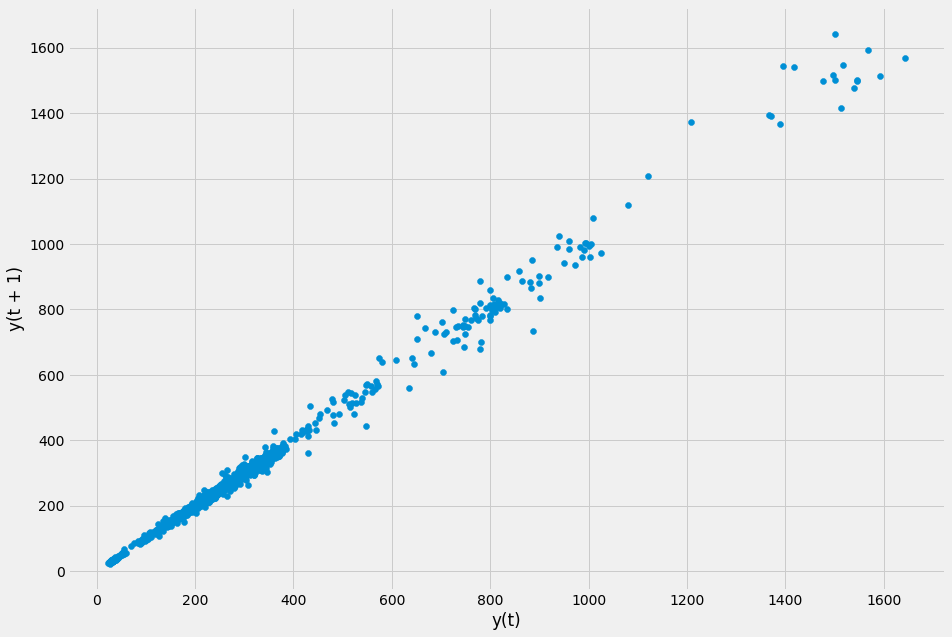

In [266]:
lag_plot(df['Adj Close'])
plt.show()

In [267]:
values = pd.DataFrame(df.values) 
dataframe = pd.concat([values.shift(1), values], axis=1) 
dataframe.columns = ['t', 't+1'] 
result = dataframe.corr() 
print(result)

            t       t+1
t    1.000000  0.997436
t+1  0.997436  1.000000


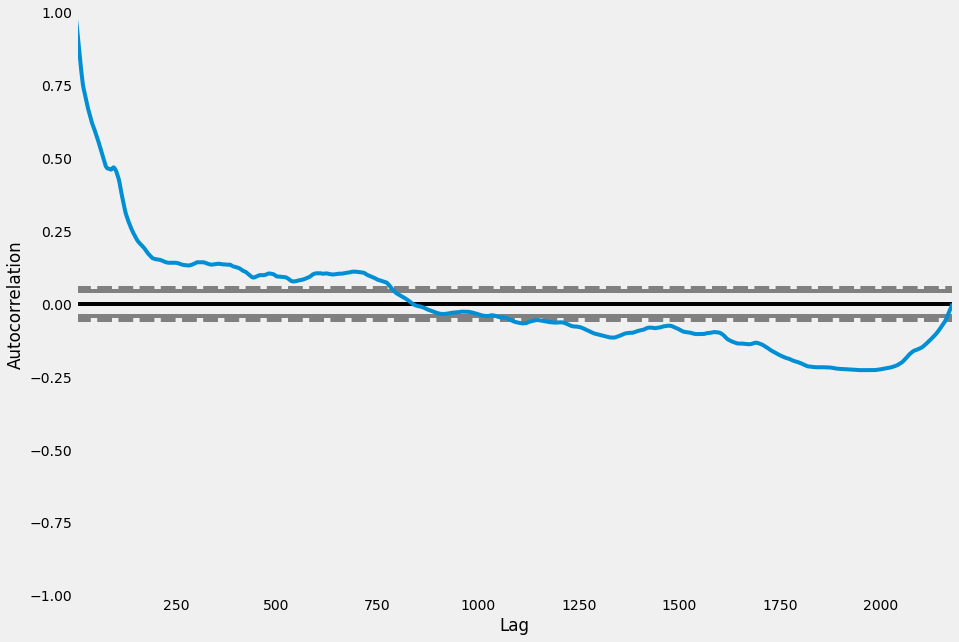

In [268]:
autocorrelation_plot(df['Adj Close']) 
plt.show()

In [269]:
from statsmodels.graphics.tsaplots import plot_acf

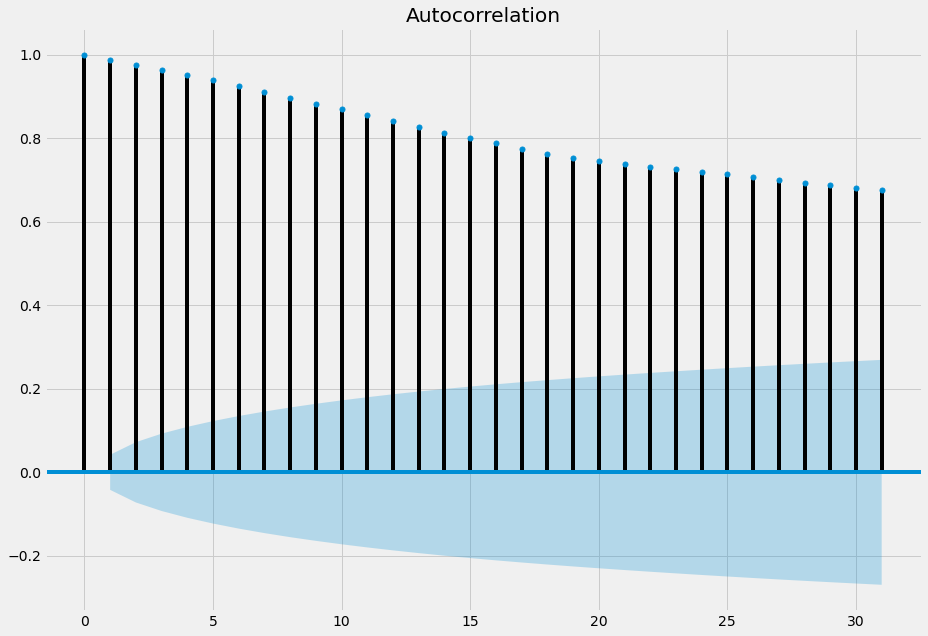

In [270]:
plot_acf(df['Adj Close'], lags=31) 
plt.show()

Test RMSE: 76.702


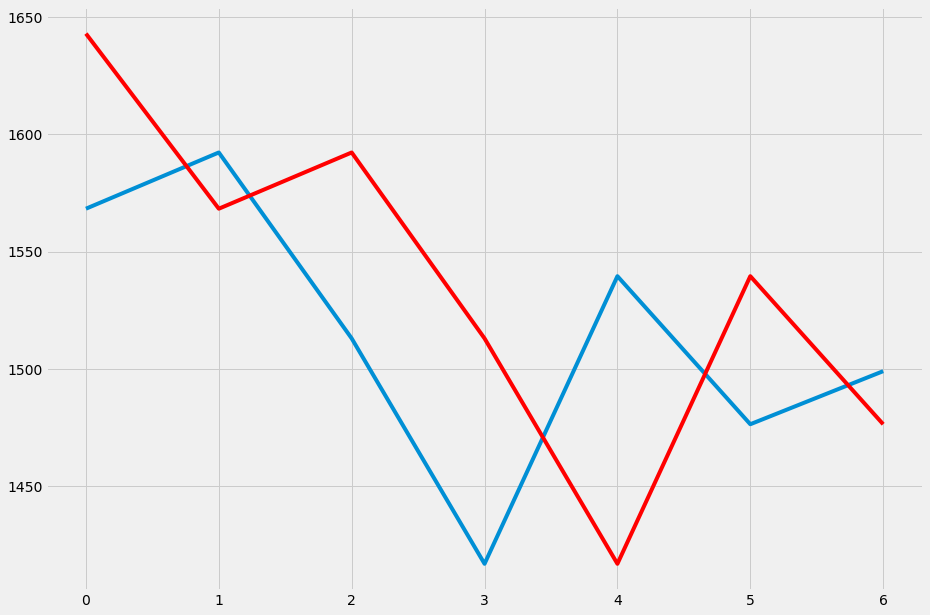

In [272]:
# create lagged dataset 
values = pd.DataFrame(df['Adj Close'].values) 
dataframe = pd.concat([values.shift(1), values], axis=1) 
dataframe.columns = ['t', 't+1'] 
# split into train and test sets 
X = dataframe.values 
train, test = X[1:len(X)-7], X[len(X)-7:] 
train_X, train_y = train[:,0], train[:,1] 
test_X, test_y = test[:,0], test[:,1] 

# persistence model 
def model_persistence(x):
    return x 

# walk-forward validation 
predictions = list() 

for x in test_X:

    yhat = model_persistence(x)

    predictions.append(yhat) 
rmse = sqrt(mean_squared_error(test_y, predictions)) 
print('Test RMSE: %.3f' % rmse) 

# plot predictions vs expected 
plt.plot(test_y) 
plt.plot(predictions, color='red') 
plt.show()

In [273]:
### Auto Regression MOdel ###

In [274]:
from statsmodels.tsa.ar_model import AR 
from sklearn.metrics import mean_squared_error 
from math import sqrt

Lag: 26
Coefficients: [-1.38441267  1.04131034 -0.04313292  0.11410289 -0.14796197  0.02704953
  0.02054483  0.06361129 -0.06706052 -0.03979456  0.18140857 -0.14878932
  0.05761742 -0.00562364  0.02677429 -0.02779056 -0.11524747 -0.02424225
  0.12300673 -0.10619757  0.01105186  0.04027703 -0.01162894  0.01186923
  0.08660737 -0.0384852  -0.02120059]
predicted=1677.466650, expected=1568.359985
predicted=1704.188831, expected=1592.329956
predicted=1740.226778, expected=1513.069946
predicted=1784.574823, expected=1417.000000
predicted=1784.844511, expected=1539.599976
predicted=1783.291112, expected=1476.489990
predicted=1794.210968, expected=1499.109985
Test RMSE: 254.245


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:293: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:293: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:294: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:296: FutureWarning: RangeI

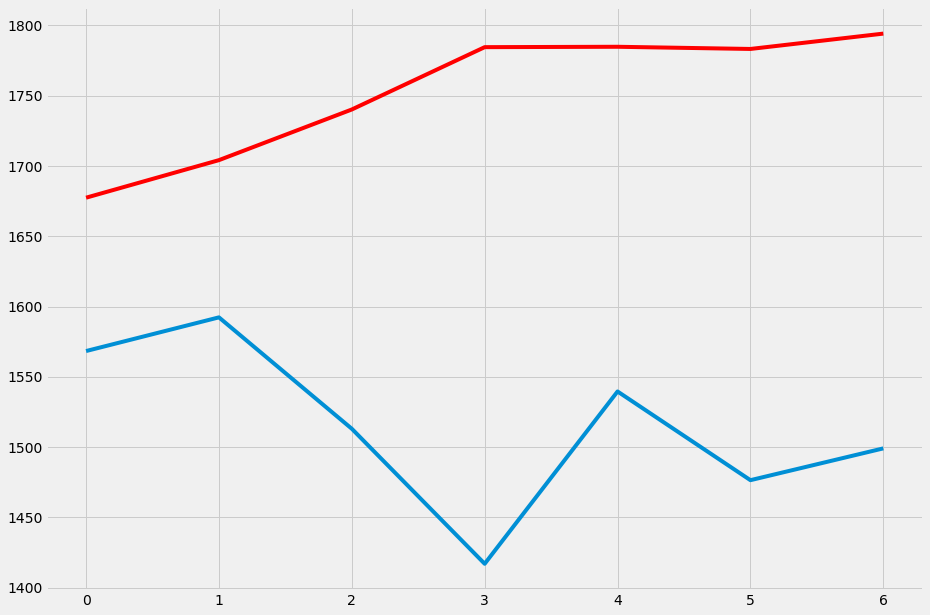

In [275]:
# split dataset 
X = df['Adj Close'].values 
train, test = X[1:len(X)-7], X[len(X)-7:] 
# train autoregression 
model = AR(train) 
model_fit = model.fit() 
print('Lag: %s' % model_fit.k_ar) 
print('Coefficients: %s' % model_fit.params) 
# make predictions 
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False) 

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = sqrt(mean_squared_error(test, predictions)) 
print('Test RMSE: %.3f' % rmse) 
# plot results 
plt.plot(test) 
plt.plot(predictions, color='red') 
plt.show()

predicted=1677.466650, expected=1568.359985
predicted=1590.574932, expected=1592.329956
predicted=1628.453064, expected=1513.069946
predicted=1540.409479, expected=1417.000000
predicted=1415.263201, expected=1539.599976
predicted=1531.450340, expected=1476.489990
predicted=1471.715816, expected=1499.109985
Test RMSE: 92.336


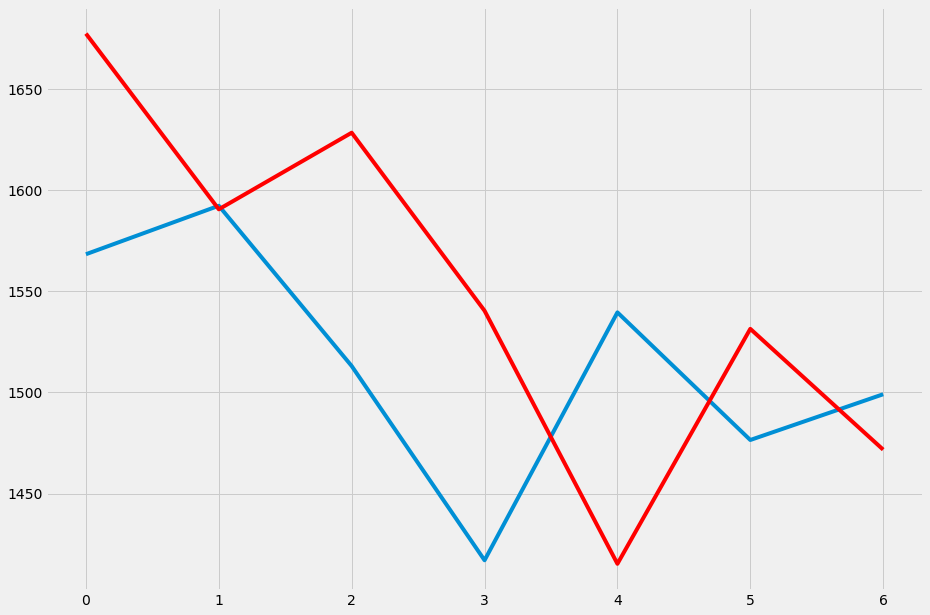

In [280]:
# split dataset 
X = df['Adj Close'].values 
train, test = X[1:len(X)-7], X[len(X)-7:] 
# train autoregression 
model = AR(train) 
model_fit = model.fit() 
window = model_fit.k_ar 
coef = model_fit.params 

# walk forward over time steps in test 
history = train[len(train)-window:] 
history = [history[i] for i in range(len(history))] 

predictions = list() 

for t in range(len(test)):

    length = len(history)

    lag = [history[i] for i in range(length-window,length)]

    yhat = coef[0]

    for d in range(window):

        yhat += coef[d+1] * lag[window-d-1]

    obs = test[t]

    predictions.append(yhat) 
    history.append(obs)

    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions)) 
print('Test RMSE: %.3f' % rmse)
# plot 
plt.plot(test) 
plt.plot(predictions, color='red') 
plt.show()

In [281]:
###Residual Forecast###

In [284]:
# create lagged dataset 
values = pd.DataFrame(df['Adj Close'].values) 
dataframe = pd.concat([values.shift(1), values], axis=1) 
dataframe.columns = ['t', 't+1'] 

# split into train and test sets 
X = dataframe.values 
train_size = int(len(X) * 0.66) 
train, test = X[1:train_size], X[train_size:] 
train_X, train_y = train[:,0], train[:,1] 
test_X, test_y = test[:,0], test[:,1] 

# persistence model 
predictions = [x for x in test_X] 

# skill of persistence model 

rmse = sqrt(mean_squared_error(test_y, predictions)) 

print('Test RMSE: %.3f' % rmse) 

# calculate residuals 

residuals = [test_y[i]-predictions[i] for i in range(len(predictions))] 
residuals = pd.DataFrame(residuals) 
print(residuals.head())

Test RMSE: 23.175
           0
0  -4.460022
1  -9.600006
2   3.490021
3  11.419983
4   0.160004


We can model the residual error time series using an autoregression model. This is a linear regression model that creates a weighted linear sum of lagged residual error terms.

In [287]:
# create lagged dataset 
values = pd.DataFrame(df['Adj Close'].values) 
dataframe = pd.concat([values.shift(1), values], axis=1) 
dataframe.columns = ['t', 't+1'] 

# split into train and test sets 

X = dataframe.values 
train_size = int(len(X) * 0.66) 
train, test = X[1:train_size], X[train_size:] 
train_X, train_y = train[:,0], train[:,1] 
test_X, test_y = test[:,0], test[:,1] 

# persistence model on training set 
train_pred = [x for x in train_X] 

# calculate residuals 
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))] 

# model the training set residuals 
model = AR(train_resid) 
model_fit = model.fit() 
window = model_fit.k_ar 
coef = model_fit.params 
print('Lag=%d, Coef=%s' % (window, coef))

Lag=23, Coef=[ 0.22583245  0.04009515  0.00788837 -0.0493824  -0.01798702  0.01409656
 -0.00702188  0.01426368  0.03940355 -0.01537961  0.01196624  0.02969064
 -0.00357931 -0.01899191  0.00489785 -0.01341616 -0.00077126  0.00084603
  0.01919817  0.01983046 -0.02734227 -0.02830693 -0.00993152  0.00400718]


In [290]:
# walk forward over time steps in test 
history = train_resid[len(train_resid)-window:] 
history = [history[i] for i in range(len(history))] 
predictions = list() 
expected_error = list() 

for t in range(len(test_y)):

    # persistence

    yhat = test_X[t]

    error = test_y[t] - yhat

    expected_error.append(error) 

    # predict error 
    length = len(history) 
    lag = [history[i] for i in range(length-window,length)] 
    pred_error = coef[0] 
    for d in range(window):

        pred_error += coef[d+1] * lag[window-d-1]
        
    predictions.append(pred_error) 
    history.append(error) 
    print('predicted error=%f, expected error=%f' % (pred_error, error))

predicted error=1.188429, expected error=-4.460022
predicted error=-0.487398, expected error=-9.600006
predicted error=-0.641989, expected error=3.490021
predicted error=0.789169, expected error=11.419983
predicted error=0.897787, expected error=0.160004
predicted error=-0.461502, expected error=-4.880005
predicted error=-0.067990, expected error=-2.389984
predicted error=0.583441, expected error=1.699982
predicted error=1.039040, expected error=5.820007
predicted error=-0.355084, expected error=2.720001
predicted error=-0.423666, expected error=-0.500000
predicted error=-0.254859, expected error=-5.809998
predicted error=-0.874471, expected error=-5.059998
predicted error=-0.197413, expected error=6.079987
predicted error=1.689096, expected error=-7.209991
predicted error=0.669708, expected error=20.290009
predicted error=0.509829, expected error=-0.940002
predicted error=0.167179, expected error=3.480011
predicted error=-0.806198, expected error=11.410004
predicted error=0.216923, ex

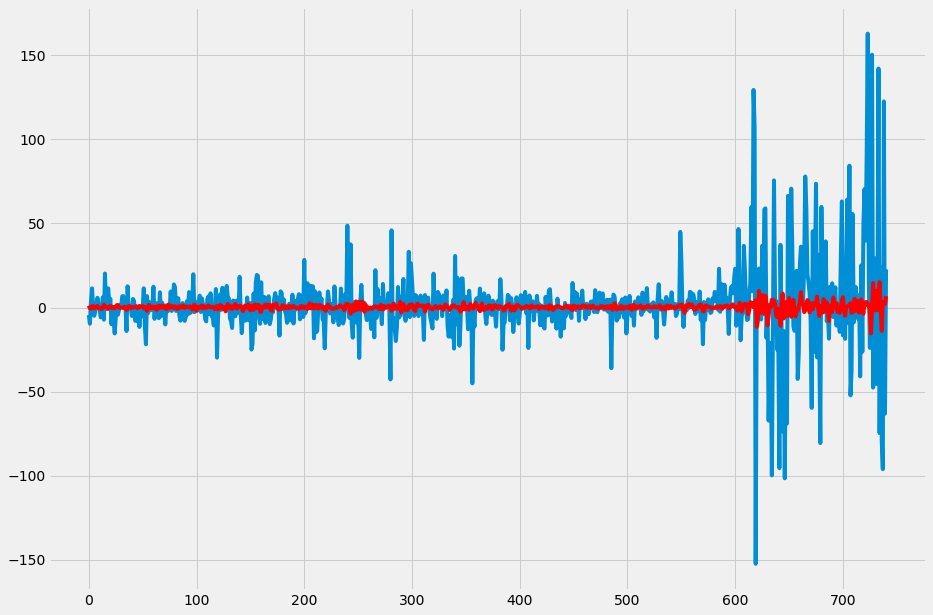

In [291]:
# plot predicted error 
plt.plot(expected_error) 
plt.plot(predictions, color='red') 
plt.show()

A model of forecast residual error is interesting, but it can also be useful to make better predictions. With a good estimate of forecast error at a time step, we can make better predictions. For example, we can add the expected forecast error to a prediction to correct it and in turn improve the skill of the model.

predicted=353.108443, expected=347.459991
predicted=346.972593, expected=337.859985
predicted=337.217997, expected=341.350006
predicted=342.139175, expected=352.769989
predicted=353.667776, expected=352.929993
predicted=352.468490, expected=348.049988
predicted=347.981998, expected=345.660004
predicted=346.243445, expected=347.359985
predicted=348.399026, expected=353.179993
predicted=352.824908, expected=355.899994
predicted=355.476328, expected=355.399994
predicted=355.145135, expected=349.589996
predicted=348.715526, expected=344.529999
predicted=344.332586, expected=350.609985
predicted=352.299081, expected=343.399994
predicted=344.069701, expected=363.690002
predicted=364.199831, expected=362.750000
predicted=362.917179, expected=366.230011
predicted=365.423813, expected=377.640015
predicted=377.856937, expected=379.809998
predicted=380.754222, expected=385.000000
predicted=385.512134, expected=375.100006
predicted=374.751512, expected=373.910004
predicted=374.208719, expected=366

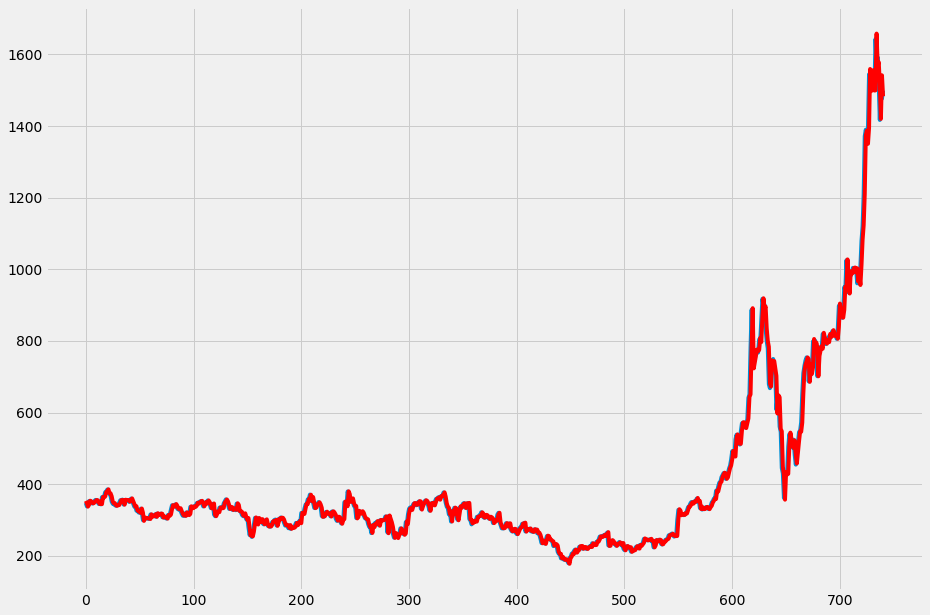

In [293]:
# create lagged dataset 
values = pd.DataFrame(df['Adj Close'].values) 
dataframe = pd.concat([values.shift(1), values], axis=1) 
dataframe.columns = ['t', 't+1'] 

# split into train and test sets 
X = dataframe.values 
train_size = int(len(X) * 0.66) 
train, test = X[1:train_size], X[train_size:] 
train_X, train_y = train[:,0], train[:,1] 
test_X, test_y = test[:,0], test[:,1] 

# persistence model on training set 
train_pred = [x for x in train_X] 

# calculate residuals

train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))] 

# model the training set residuals 

model = AR(train_resid) 
model_fit = model.fit() 
window = model_fit.k_ar 
coef = model_fit.params 


# walk forward over time steps in test 
history = train_resid[len(train_resid)-window:] 
history = [history[i] for i in range(len(history))] 
predictions = list() 

for t in range(len(test_y)):

    # persistence

    yhat = test_X[t]

    error = test_y[t] - yhat

    # predict error 
    length = len(history) 
    lag = [history[i] for i in range(length-window,length)] 

    pred_error = coef[0] 

    for d in range(window):

        pred_error += coef[d+1] * lag[window-d-1] 
    # correct the prediction 
    yhat = yhat + pred_error 
    predictions.append(yhat) 
    history.append(error)

    print('predicted=%f, expected=%f' % (yhat, test_y[t]))

# error 
rmse = sqrt(mean_squared_error(test_y, predictions)) 
print('Test RMSE: %.3f' % rmse) 
# plot predicted error 
plt.plot(test_y) 
plt.plot(predictions, color='red') 
plt.show()

In [294]:
from statsmodels.tsa.arima_model import ARIMA

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 2177
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8824.064
Method:                       css-mle   S.D. of innovations             13.934
Date:                Thu, 30 Jul 2020   AIC                          17662.129
Time:                        18:49:05   BIC                          17701.929
Sample:                             1   HQIC                         17676.680
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6767      0.346      1.954      0.051      -0.002       1.355
ar.L1.D.Adj Close    -0.0023      0.021     -0.106      0.915      -0.044       0.040
ar.L2.D.Adj Close     0.

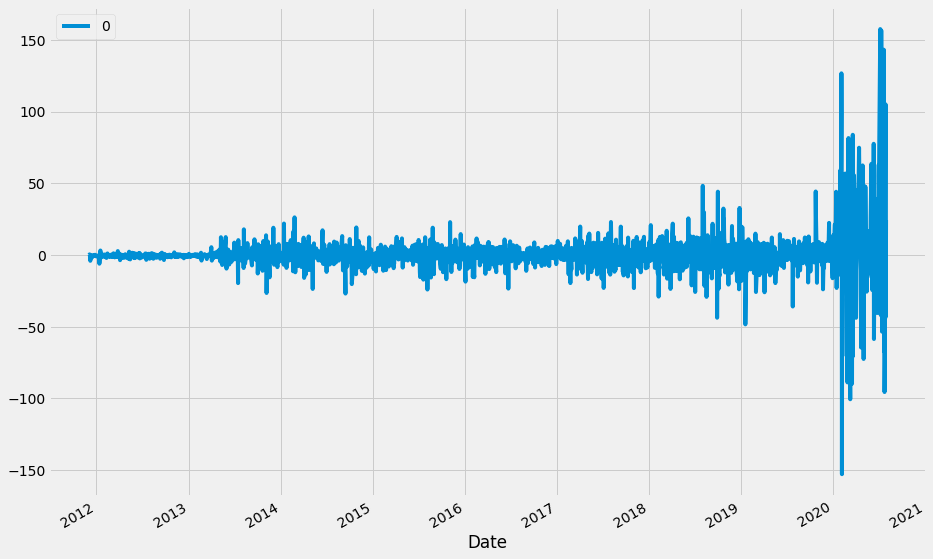

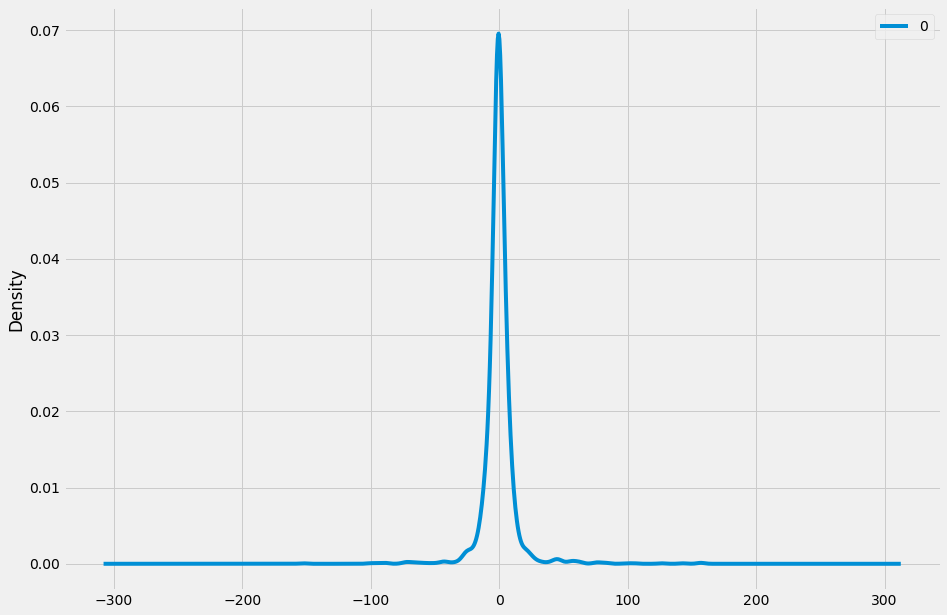

                 0
count  2177.000000
mean      0.000076
std      13.937436
min    -152.774393
25%      -3.306777
50%      -0.439060
75%       2.892052
max     157.488263


In [296]:
# fit model
model = ARIMA(df['Adj Close'], order=(5,1,0))

model_fit = model.fit(disp=0)

# summary of fit model 
print(model_fit.summary()) 

# line plot of residuals 

residuals = pd.DataFrame(model_fit.resid) 
residuals.plot() 
plt.show() 

# density plot of residuals

residuals.plot(kind='kde')

plt.show() 

# summary stats of residuals 

print(residuals.describe())

24.4 Rolling Forecast ARIMA Model

The ARIMA model can be used to forecast future time steps. We can use the predict() function on the ARIMAResults object 4 to make predictions. It accepts the index of the time steps to make predictions as arguments. These indexes are relative to the start of the training dataset used to make predictions.

If we used 100 observations in the training dataset to ﬁt the model, then the index of the next time step for making a prediction would be speciﬁed to the prediction function as start=101, end=101. This would return an array with one element containing the prediction. We also would prefer the forecasted values to be in the original scale, in case we performed any diﬀerencing (d > 0 when conﬁguring the model). This can be speciﬁed by setting the typ argument to the value ’levels’: typ=’levels’.

Alternately, we can avoid all of these speciﬁcations by using the forecast() function 5 which performs a one-step forecast using the model. We can split the training dataset into train and test sets, use the train set to ﬁt the model, and generate a prediction for each element on the test set.

A rolling forecast is required given the dependence on observations in prior time steps for diﬀerencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received. We manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration. Putting this all together, below is an example of a rolling forecast with the ARIMA model in Python.

predicted=351.672219, expected=347.459991
predicted=347.489265, expected=337.859985
predicted=338.124315, expected=341.350006
predicted=342.081215, expected=352.769989
predicted=354.000386, expected=352.929993
predicted=353.227559, expected=348.049988
predicted=347.300311, expected=345.660004
predicted=345.535530, expected=347.359985
predicted=348.019579, expected=353.179993
predicted=353.898196, expected=355.899994
predicted=356.171835, expected=355.399994
predicted=355.243573, expected=349.589996
predicted=349.303813, expected=344.529999
predicted=344.539360, expected=350.609985
predicted=351.446586, expected=343.399994
predicted=343.714152, expected=363.690002
predicted=364.381323, expected=362.750000
predicted=363.278702, expected=366.230011
predicted=365.710295, expected=377.640015
predicted=377.750924, expected=379.809998
predicted=380.378865, expected=385.000000
predicted=384.801558, expected=375.100006
predicted=374.646574, expected=373.910004
predicted=373.870085, expected=366

predicted=292.013644, expected=284.730011
predicted=284.512973, expected=291.820007
predicted=292.030648, expected=296.739990
predicted=296.736880, expected=291.130005
predicted=290.952105, expected=319.500000
predicted=320.447031, expected=316.089996
predicted=315.664073, expected=317.660004
predicted=317.759810, expected=332.100006
predicted=331.837188, expected=342.769989
predicted=342.636617, expected=344.779999
predicted=344.965217, expected=357.720001
predicted=357.910682, expected=358.170013
predicted=357.729638, expected=370.829987
predicted=371.224434, expected=352.549988
predicted=351.887041, expected=362.220001
predicted=362.331971, expected=347.510010
predicted=347.281261, expected=333.630005
predicted=333.599850, expected=333.010010
predicted=333.358398, expected=342.000000
predicted=342.513426, expected=344.500000
predicted=345.498267, expected=349.929993
predicted=350.643218, expected=342.950012
predicted=342.771460, expected=335.070007
predicted=334.736714, expected=310

predicted=283.653490, expected=288.959991
predicted=288.667239, expected=289.959991
predicted=289.764164, expected=275.429993
predicted=275.845657, expected=269.489990
predicted=269.724087, expected=267.470001
predicted=267.475474, expected=273.600006
predicted=274.034532, expected=274.019989
predicted=274.849252, expected=264.529999
predicted=265.045902, expected=260.420013
predicted=260.459081, expected=267.769989
predicted=267.616415, expected=274.829987
predicted=275.155886, expected=278.619995
predicted=279.067939, expected=279.859985
predicted=279.866310, expected=289.179993
predicted=288.733043, expected=285.880005
predicted=285.815567, expected=291.809998
predicted=291.616915, expected=267.779999
predicted=268.187067, expected=274.959991
predicted=274.494084, expected=273.200012
predicted=273.631063, expected=272.309998
predicted=272.834294, expected=276.059998
predicted=276.674706, expected=268.420013
predicted=268.613675, expected=267.700012
predicted=267.831404, expected=266

predicted=392.575391, expected=404.040009
predicted=403.989784, expected=405.589996
predicted=405.078167, expected=419.220001
predicted=419.012278, expected=425.250000
predicted=425.052679, expected=430.940002
predicted=430.744083, expected=430.380005
predicted=430.343198, expected=414.700012
predicted=414.464584, expected=418.329987
predicted=418.049591, expected=430.260010
predicted=430.524700, expected=443.010010
predicted=443.536571, expected=451.540009
predicted=451.995085, expected=469.059998
predicted=468.908948, expected=492.140015
predicted=492.168619, expected=481.339996
predicted=481.274238, expected=478.149994
predicted=477.435110, expected=524.859985
predicted=524.431310, expected=537.919983
predicted=538.251141, expected=518.500000
predicted=518.911917, expected=513.489990
predicted=513.669881, expected=510.500000
predicted=509.665441, expected=547.200012
predicted=547.510537, expected=569.559998
predicted=570.042287, expected=572.200012
predicted=571.992199, expected=564

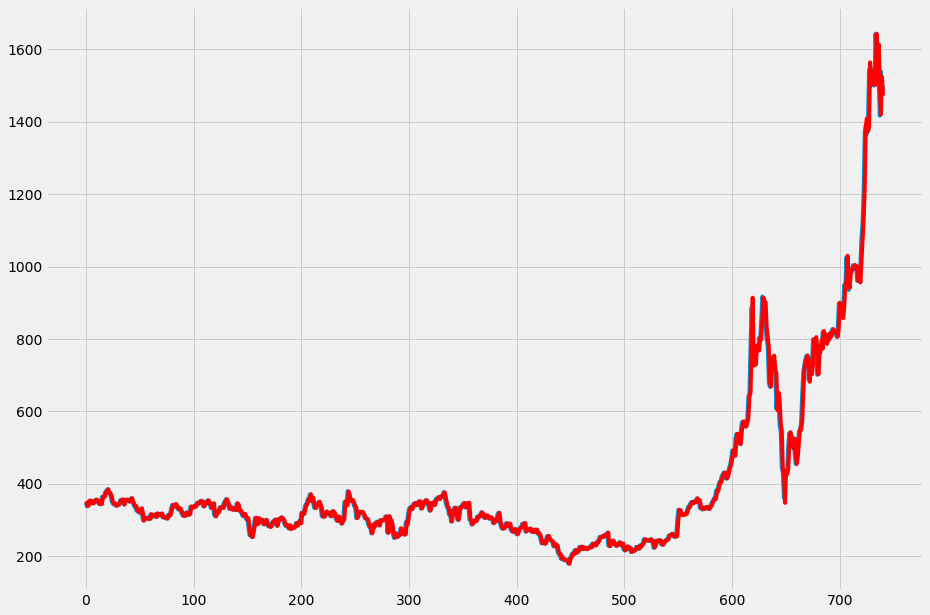

In [298]:
# split into train and test sets 
X = df['Adj Close'].values 
size = int(len(X) * 0.66) 
train, test = X[0:size], X[size:len(X)] 
history = [x for x in train] 
predictions = list() 

# walk-forward validation f

for t in range(len(test)):

    model = ARIMA(history, order=(5,1,0))

    model_fit = model.fit(disp=0)

    output = model_fit.forecast()
    
    yhat = output[0]
    
    predictions.append(yhat)

    obs = test[t]

    history.append(obs)

    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts 
rmse = sqrt(mean_squared_error(test, predictions)) 
print('Test RMSE: %.3f' % rmse) 

# plot forecasts against actual outcomes 
plt.plot(test) 
plt.plot(predictions, color='red') 
plt.show()


In [299]:
#Autocorrelation and Partial Autocorrelation##

Statistical correlation summarizes the strength of the relationship between two variables. We can assume the distribution of each variable ﬁts a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coeﬃcient to summarize the correlation between the variables. The Pearson’s correlation coeﬃcient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation. A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF.

In [300]:
from statsmodels.graphics.tsaplots import plot_acf

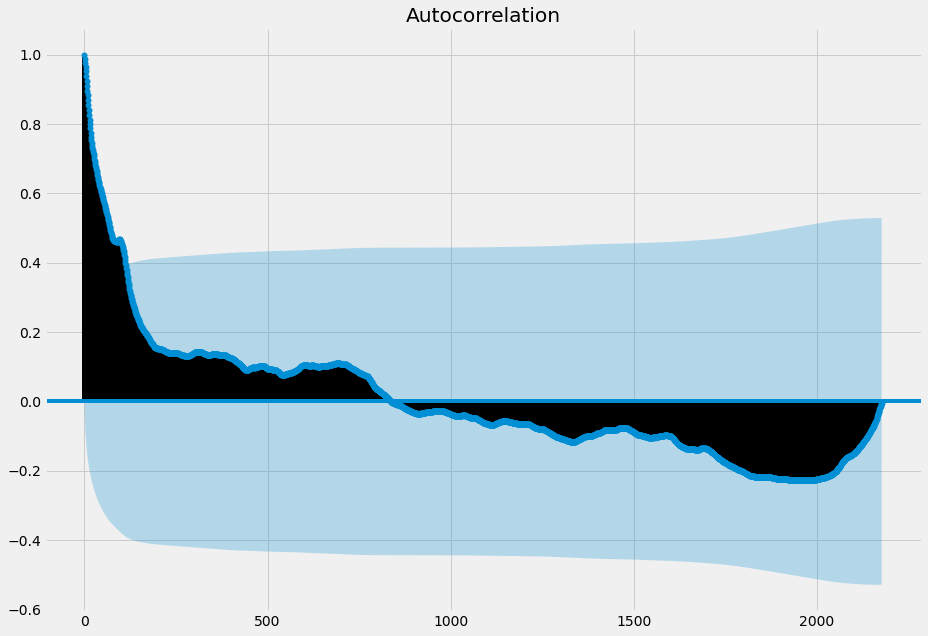

In [301]:
plot_acf(df['Adj Close']) 
plt.show()

Running the example creates a 2D plot showing the lag value along the x-axis and the correlation on the y-axis between -1 and 1. Conﬁdence intervals are drawn as a cone. By default, this is set to a 95% conﬁdence interval, suggesting that correlation values outside of this cone are very likely a correlation and not a statistical ﬂuke.

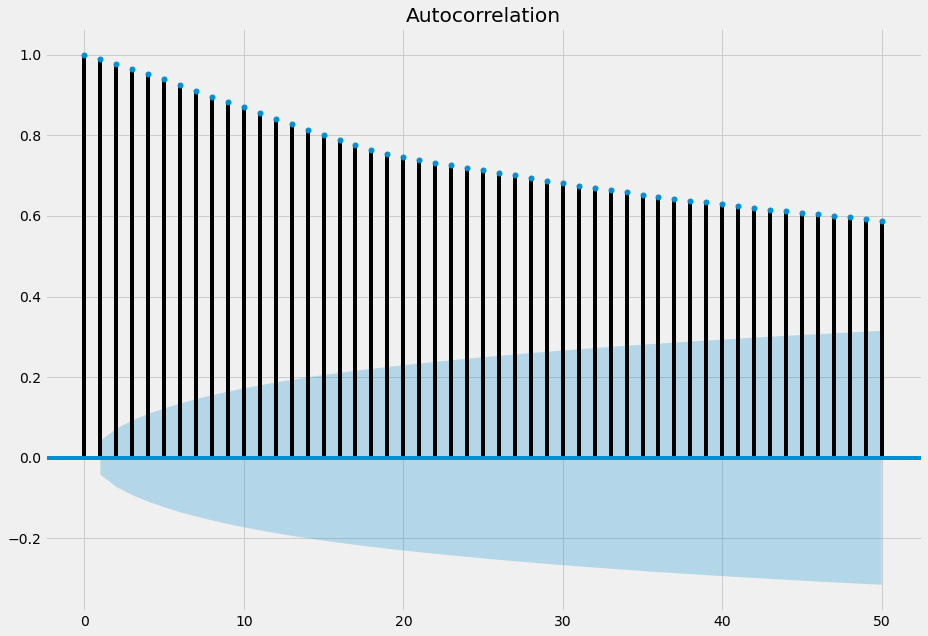

In [302]:
plot_acf(df['Adj Close'], lags=50) 
plt.show()

In [303]:
#25.3 Partial Autocorrelation Function

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The partial autocorrelation at lag k is the correlation that results after removing the eﬀect of any correlations due to the terms at shorter lags.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps. It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.


In [304]:
from statsmodels.graphics.tsaplots import plot_pacf

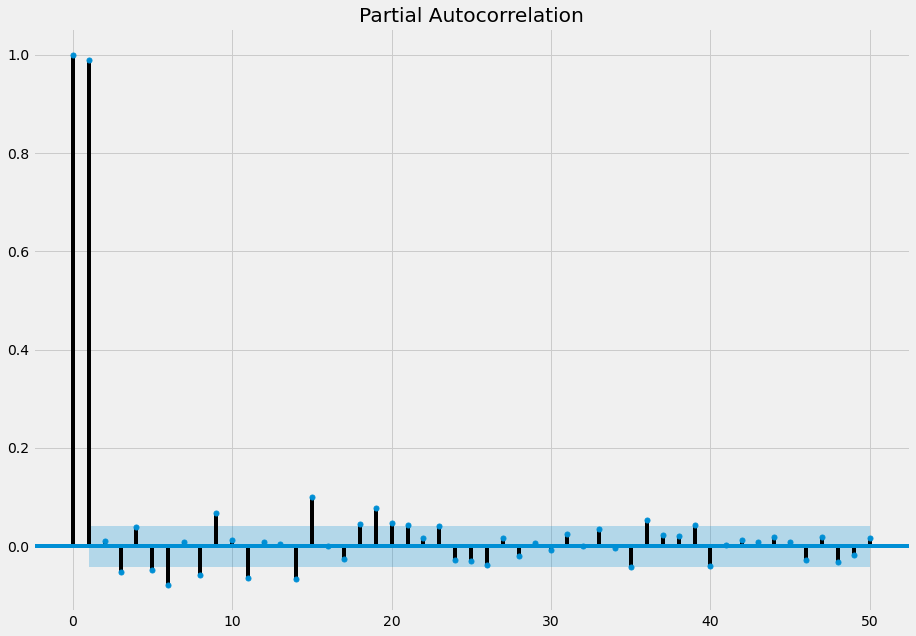

In [307]:
plot_pacf(df['Adj Close'], lags=50) 
plt.show()

In [308]:
# 25.4 Intuition for ACF and PACF Plots#

25.4.1 Autoregression Intuition

Consider a time series that was generated by an autoregression (AR) process with a lag of k. We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information. This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing oﬀ at some point as the eﬀect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k. This is exactly the expectation of the ACF and PACF plots for an AR(k) process.


25.4.2 Moving Average Intuition

Consider a time series that was generated by a moving average (MA) process with a lag of k. Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts. We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By deﬁnition, this is how the process was generated.

For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing oﬀ of correlation from the lag onwards. Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.

In [309]:
### Grid Search ARIMA Model Hyperparameters### 

26.2 Evaluate ARIMA Model

We can evaluate an ARIMA model by preparing it on a training dataset and evaluating predictions on a test dataset. This approach involves the following steps:

1. Split the dataset into training and test sets.

2. Walk the time steps in the test dataset.

(a) Train an ARIMA model.

(b) Make a one-step prediction.

(c) Store prediction; get and store actual observation.

3. Calculate error score for predictions compared to expected values.

In [310]:
# evaluate an ARIMA model for a given order (p,d,q) 
def evaluate_arima_model(X, arima_order):

    # prepare training dataset 
    train_size = int(len(X) * 0.66)

    train, test = X[0:train_size], X[train_size:]

    history = [x for x in train] 
    # make predictions 
    predictions = list() 
    for t in range(len(test)):

        model = ARIMA(history, order=arima_order)

        model_fit = model.fit(disp=0)

        yhat = model_fit.forecast()[0]

        predictions.append(yhat) 
        history.append(test[t]) 
    # calculate out-of-sample error 
    rmse = sqrt(mean_squared_error(test, predictions)) 
    return rmse

26.3 Iterate ARIMA Parameters

Evaluating a suite of parameters is relatively straightforward. The user must specify a grid of p, d, and q ARIMA parameters to iterate. A model is created for each parameter and its performance evaluated by calling the evaluate arima model() function described in the previous section. The function must keep track of the lowest error score observed and the conﬁguration that caused it. This can be summarized at the end of the function with a print to standard out.

We can implement this function called evaluate models() as a series of four loops. There are two additional considerations. The ﬁrst is to ensure the input data are ﬂoating point values (as opposed to integers or strings), as this can cause the ARIMA procedure to fail. Second, the Statsmodels ARIMA procedure internally uses numerical optimization procedures to ﬁnd a set of coeﬃcients for the model. These procedures can fail, which in turn can throw an exception. We must catch these exceptions and skip those conﬁgurations that cause a problem. This happens more often then you would think. Additionally, it is recommended that warnings be ignored for this code to avoid a lot of noise from running the procedure.

In [311]:
import warnings 
warnings.filterwarnings("ignore")

In [313]:
# evaluate combinations of p, d and q values for an ARIMA model 
def evaluate_models(dataset, p_values, d_values, q_values):

    dataset = dataset.astype('float32') 
    best_score, best_cfg = float("inf"), None 
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q) 
                try:
                    rmse = evaluate_arima_model(dataset, order) 
                    
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order 
                    print('ARIMA%s RMSE=%.3f' % (order,rmse)) 
                except:
                    continue 
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [314]:
series = df['Adj Close']

In [315]:
# evaluate parameters 
p_values = [0, 1, 2, 4, 6, 8, 10] 
d_values = range(0, 3) 
q_values = range(0, 3) 
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=311.666
ARIMA(0, 0, 1) RMSE=161.886
ARIMA(0, 1, 0) RMSE=23.154
ARIMA(0, 1, 1) RMSE=23.316
ARIMA(0, 1, 2) RMSE=23.517
ARIMA(0, 2, 0) RMSE=33.087
ARIMA(0, 2, 1) RMSE=23.390
ARIMA(1, 0, 0) RMSE=23.196
ARIMA(1, 1, 0) RMSE=23.356
ARIMA(1, 2, 0) RMSE=28.248
ARIMA(2, 1, 0) RMSE=23.547
ARIMA(2, 2, 0) RMSE=25.731
ARIMA(4, 1, 0) RMSE=23.453
ARIMA(4, 1, 1) RMSE=23.501
ARIMA(4, 2, 0) RMSE=25.080
ARIMA(6, 1, 0) RMSE=23.617
ARIMA(6, 1, 1) RMSE=23.723
ARIMA(6, 2, 0) RMSE=24.782
ARIMA(8, 1, 0) RMSE=23.749
ARIMA(8, 2, 0) RMSE=24.800
ARIMA(10, 0, 0) RMSE=23.857
ARIMA(10, 1, 0) RMSE=23.860
ARIMA(10, 1, 1) RMSE=24.125
ARIMA(10, 2, 0) RMSE=24.488
Best ARIMA(0, 1, 0) RMSE=23.154


28.1 ARIMA Forecast

The ARIMA implementation in the Statsmodels Python library can be used to ﬁt an ARIMA model. It returns an ARIMAResults object. This object provides the forecast() function that can be used to make predictions about future time steps and default to predicting the value at the next time step after the end of the training data. Assuming we are predicting just the next time step, the forecast() method returns three values:

• Forecast. The forecasted value in the units of the training time series.

• Standard error. The standard error for the model.

• Conﬁdence interval. The 95% conﬁdence interval for the forecast.

• AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
• I: Integrated. The use of diﬀerencing of raw observations (i.e. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
• MA: Moving Average. A model that uses the dependency between an observation and residual errors from a moving average model applied to lagged observations.
Each of these components are explicitly speciﬁed in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the speciﬁc ARIMA model being used. The parameters of the ARIMA model are deﬁned as follows:
• p: The number of lag observations included in the model, also called the lag order.
• d: The number of times that the raw observations are diﬀerenced, also called the degree of diﬀerencing.
• q: The size of the moving average window, also called the order of moving average.

In [317]:
# summarize the confidence interval on an ARIMA forecast 
# load dataset 
series = df['Adj Close']

# split into train and test sets 
X = series.values 
X = X.astype('float32') 
size = len(X) - 1 
train, test = X[0:size], X[size:] 

# fit an ARIMA model 
model = ARIMA(train, order=(5,1,1)) 
model_fit = model.fit(disp=False) 

# forecast 
forecast, stderr, conf = model_fit.forecast() 

# summarize forecast and confidence intervals 
print('Expected: %.3f' % test[0]) 
print('Forecast: %.3f' % forecast) 
print('Standard Error: %.3f' % stderr) 
print('95%% Confidence Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

Expected: 1499.110
Forecast: 1475.494
Standard Error: 13.918
95% Confidence Interval: 1448.216 to 1502.773


28.4 Interpreting the Conﬁdence Interval

The forecast() function allows the conﬁdence interval to be speciﬁed. The alpha argument on the forecast() function speciﬁes the conﬁdence level. It is set by default to alpha=0.05, which is a 95% conﬁdence interval. This is a sensible and widely used conﬁdence interval. An alpha of 0.05 means that the ARIMA model will estimate the upper and lower values around the forecast where there is a only a 5% chance that the real value will not be in that range.

Put another way, the 95% conﬁdence interval suggests that there is a high likelihood that the real observation will be within the range. In the above example, the forecast was 45.878. The 95% conﬁdence interval suggested that the real observation was highly likely to fall within the range of values between 32.167 and 59.590. The real observation was 50.0 and was well within this range. We can tighten the range of likely values a few ways:

• We can ask for a range that is narrower but increases the statistical likelihood of a real observation falling outside of the range.

• We can develop a model that has more predictive power and in turn makes more accurate predictions.

Further, the conﬁdence interval is also limited by the assumptions made by the model, such as the distribution of errors made by the model ﬁt a Gaussian distribution with a zero mean value (e.g. white noise). Extending the example above, we can report our forecast with a few diﬀerent commonly used conﬁdence intervals of 80%, 90%, 95% and 99%.

In [319]:
# split data into train and test setes 
X = series.values 
X = X.astype('float32') 
size = len(X) - 1 
train, test = X[0:size], X[size:] 

# fit an ARIMA model 
model = ARIMA(train, order=(5,1,1)) 
model_fit = model.fit(disp=False) 

# summarize confidence intervals 

intervals = [0.2, 0.1, 0.05, 0.01] 

for a in intervals:

    forecast, stderr, conf = model_fit.forecast(alpha=a)

    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, 
                                                                      conf[0][0], conf[0][1]))

80.0% Confidence Interval: 1475.494 between 1457.658 and 1493.331
90.0% Confidence Interval: 1475.494 between 1452.601 and 1498.387
95.0% Confidence Interval: 1475.494 between 1448.216 and 1502.773
99.0% Confidence Interval: 1475.494 between 1439.644 and 1511.344


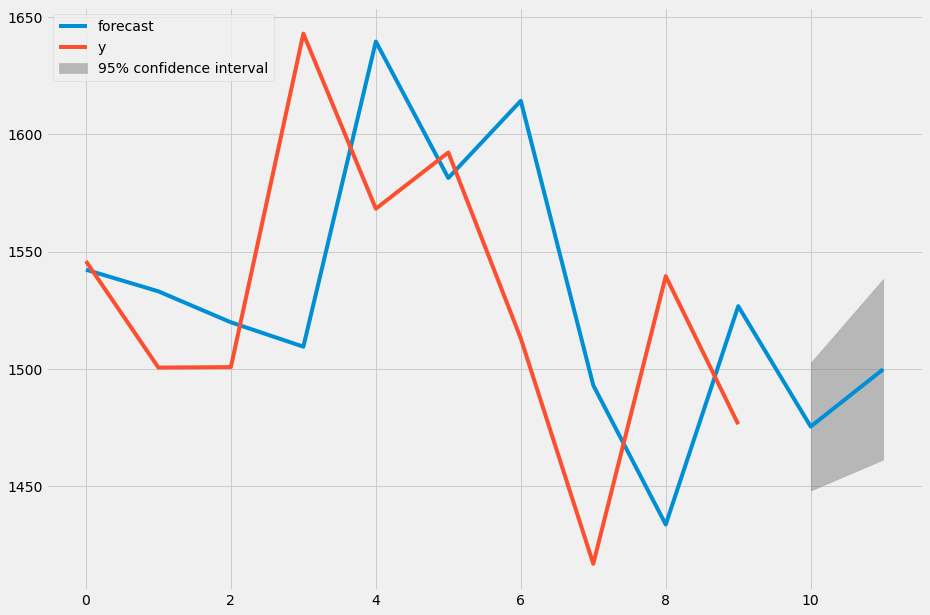

In [320]:
# split into train and test sets 
X = series.values 
X = X.astype('float32') 
size = len(X) - 1 
train, test = X[0:size], X[size:] 
# fit an ARIMA model 
model = ARIMA(train, order=(5,1,1)) 
model_fit = model.fit(disp=False) 

# plot some history and the forecast with confidence intervals 
model_fit.plot_predict(len(train)-10, len(train)+1) 
plt.legend(loc='upper left') 
plt.show()